In [1]:
import utility as ut
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
DIRECTORY = "data/"
datasets = ut.load_excel_data(DIRECTORY)

In [3]:
print(len(datasets))
print(datasets[0].shape)
print(datasets[0].columns)
max_sway_angle = 0
for i in range(len(datasets)):
    max_sway_angle = max(
        max_sway_angle, max(abs(datasets[i]["sway_angle"]))
    )

# Sort the datasets by average trolley motor PWM from lowest to highest and then by average hoist motor PWM from lowest to highest
datasets.sort(key=lambda x: np.mean(x["pwm_trolley_motor"]))
datasets.sort(key=lambda x: np.mean(x["pwm_hoist_motor"]))

39
(3010, 19)
Index(['timestamp', 'control_signal_trolley', 'control_signal_hoist',
       'pwm_trolley_motor', 'pwm_hoist_motor', 'trolley_motor_voltage',
       'hoist_motor_voltage', 'trolley_position', 'cable_length', 'sway_angle',
       'trolley_position_first_derivative', 'cable_length_first_derivative',
       'sway_angle_first_derivative', 'trolley_position_second_derivative',
       'cable_length_second_derivative', 'sway_angle_second_derivative',
       'trolley_position_third_derivative', 'cable_length_third_derivative',
       'sway_angle_third_derivative'],
      dtype='object')


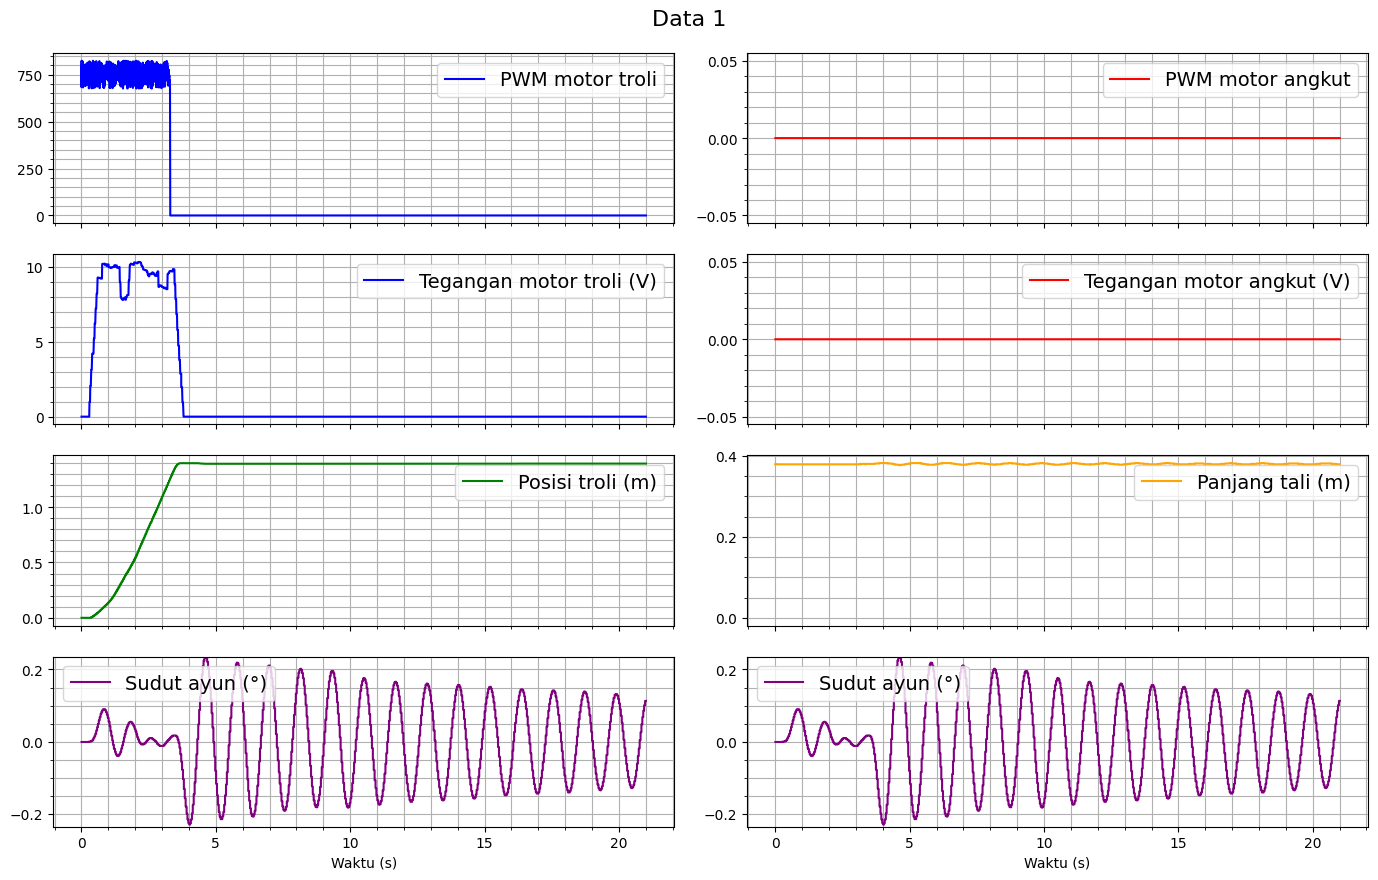

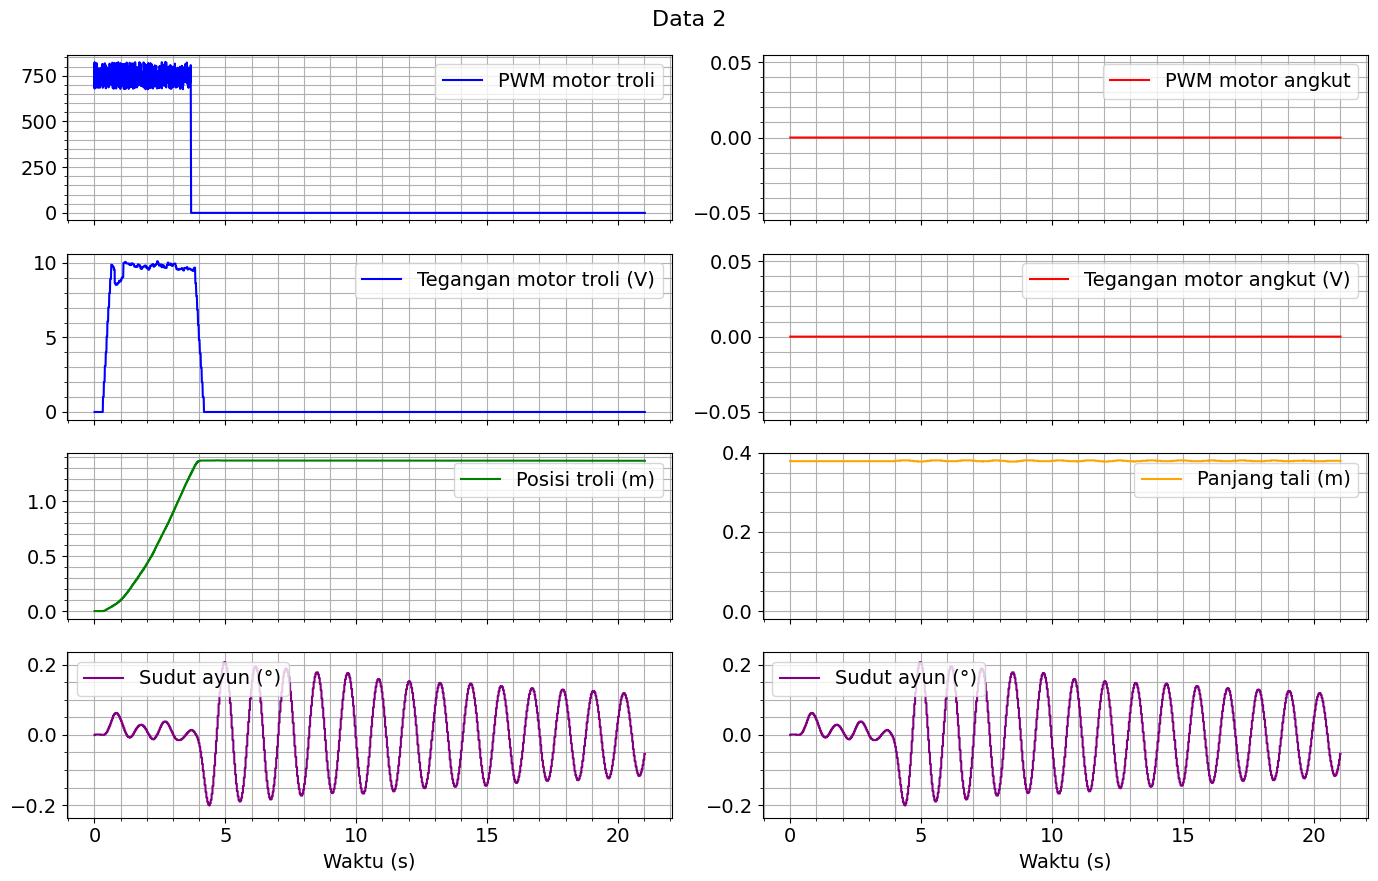

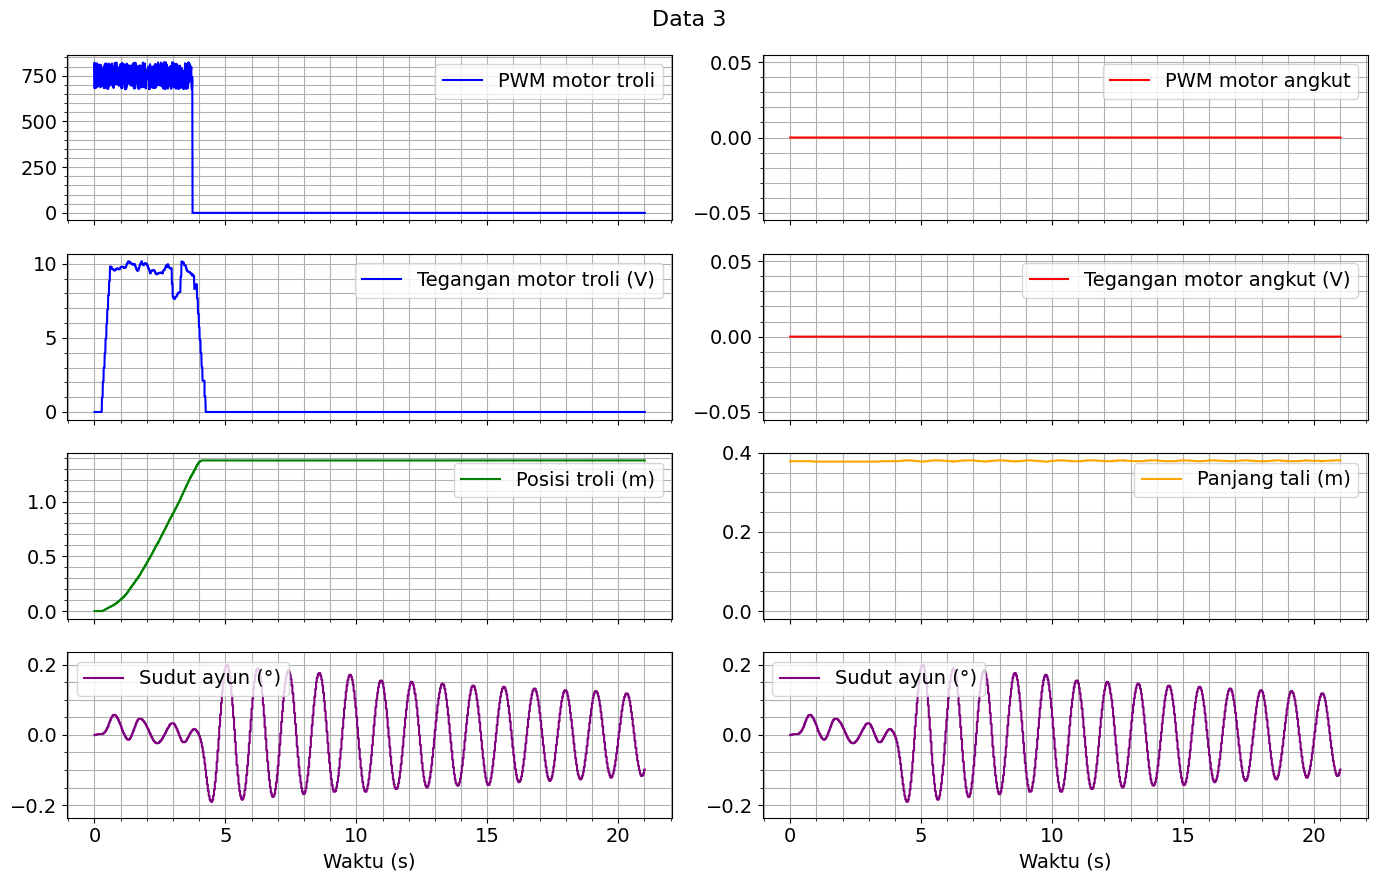

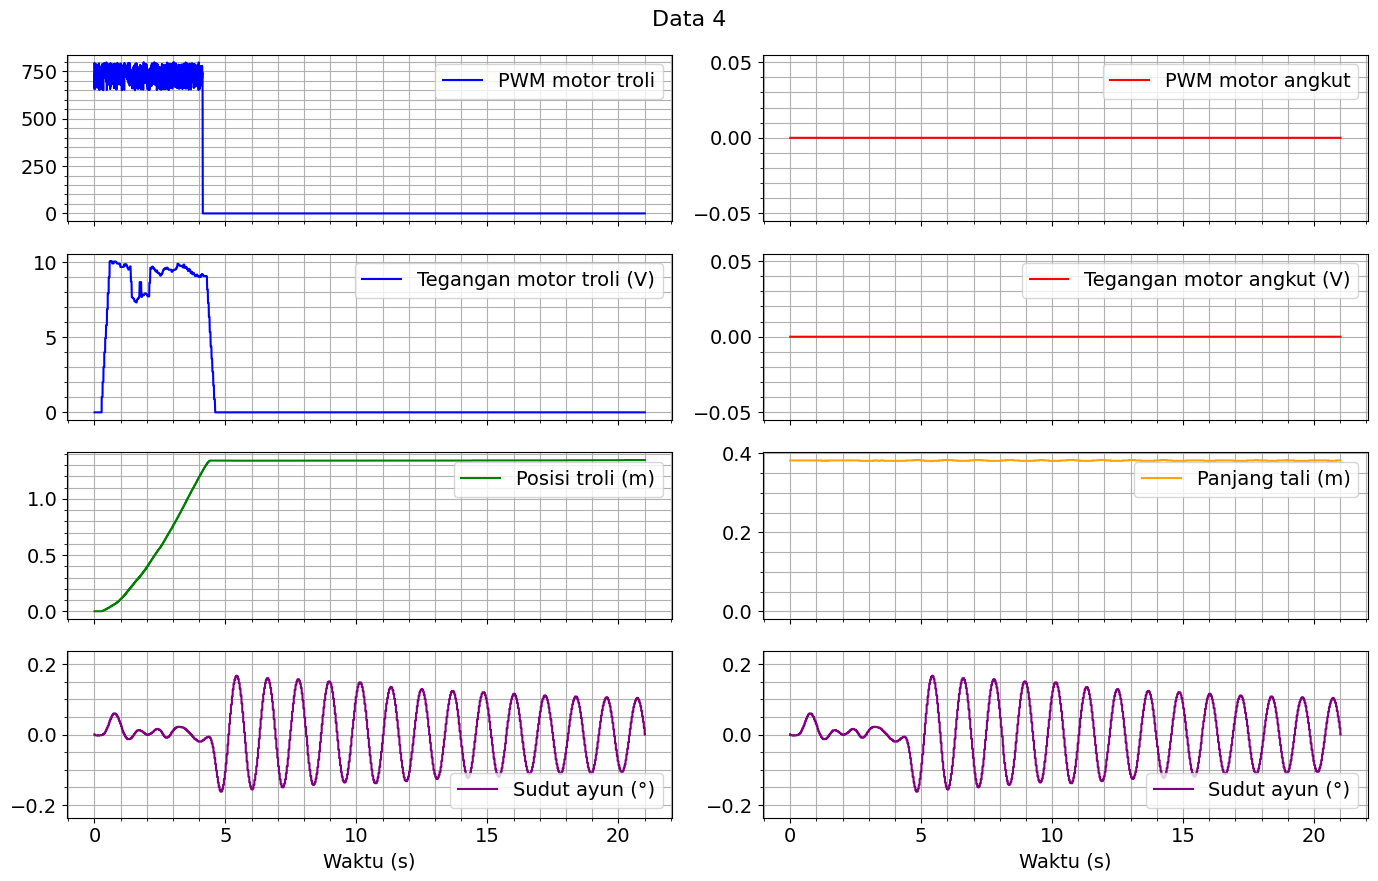

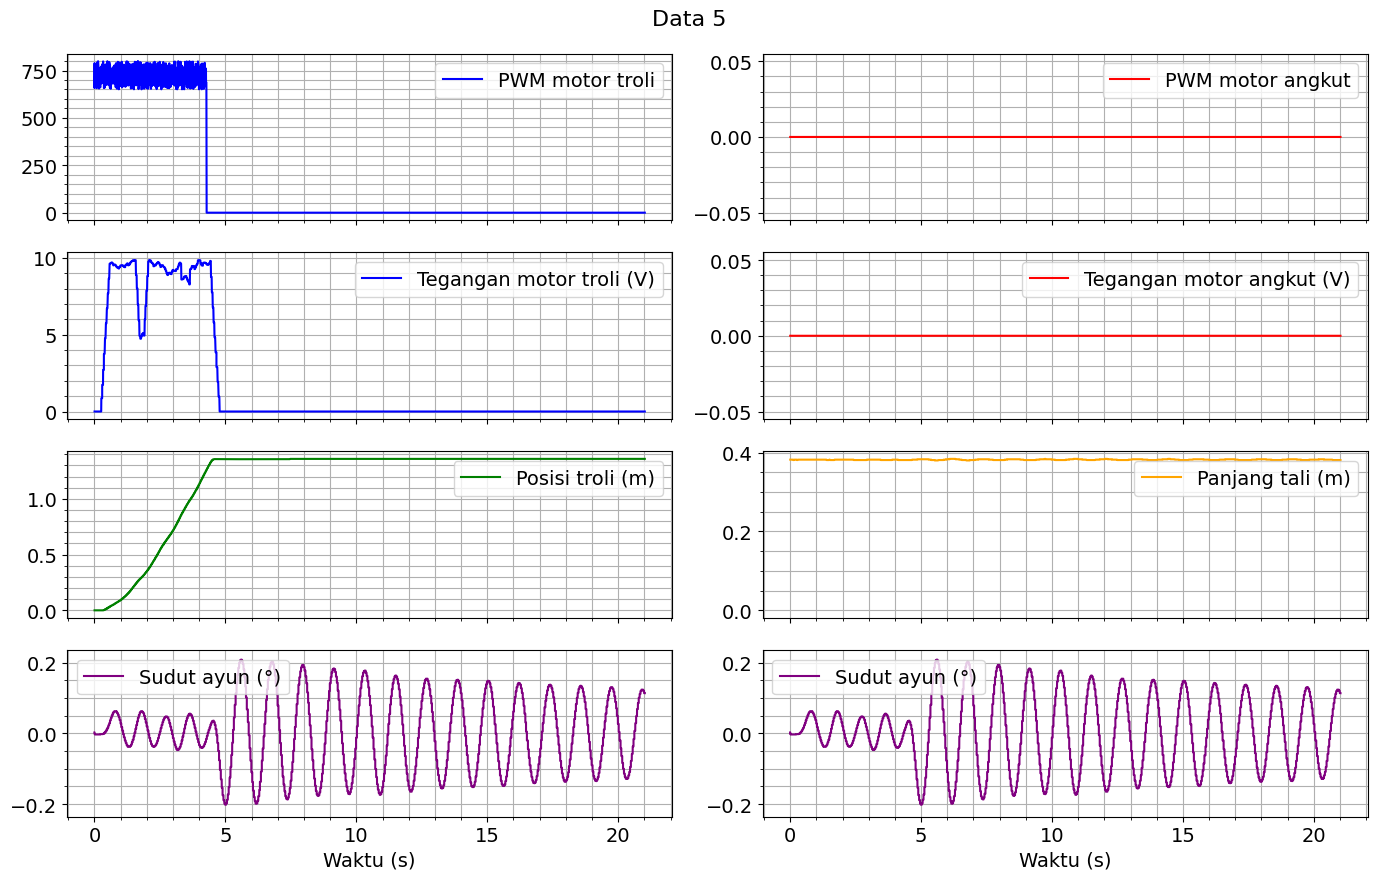

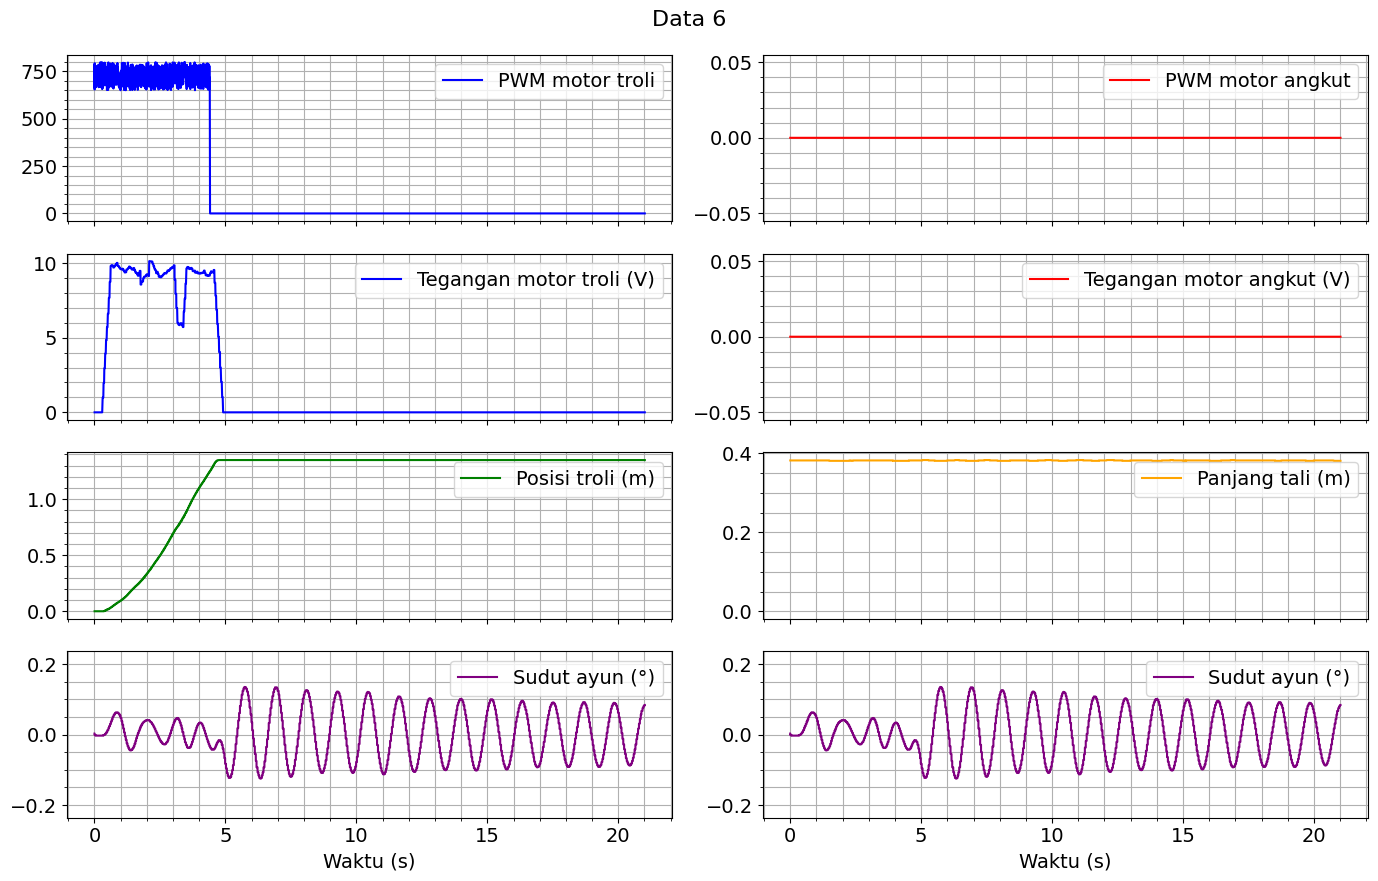

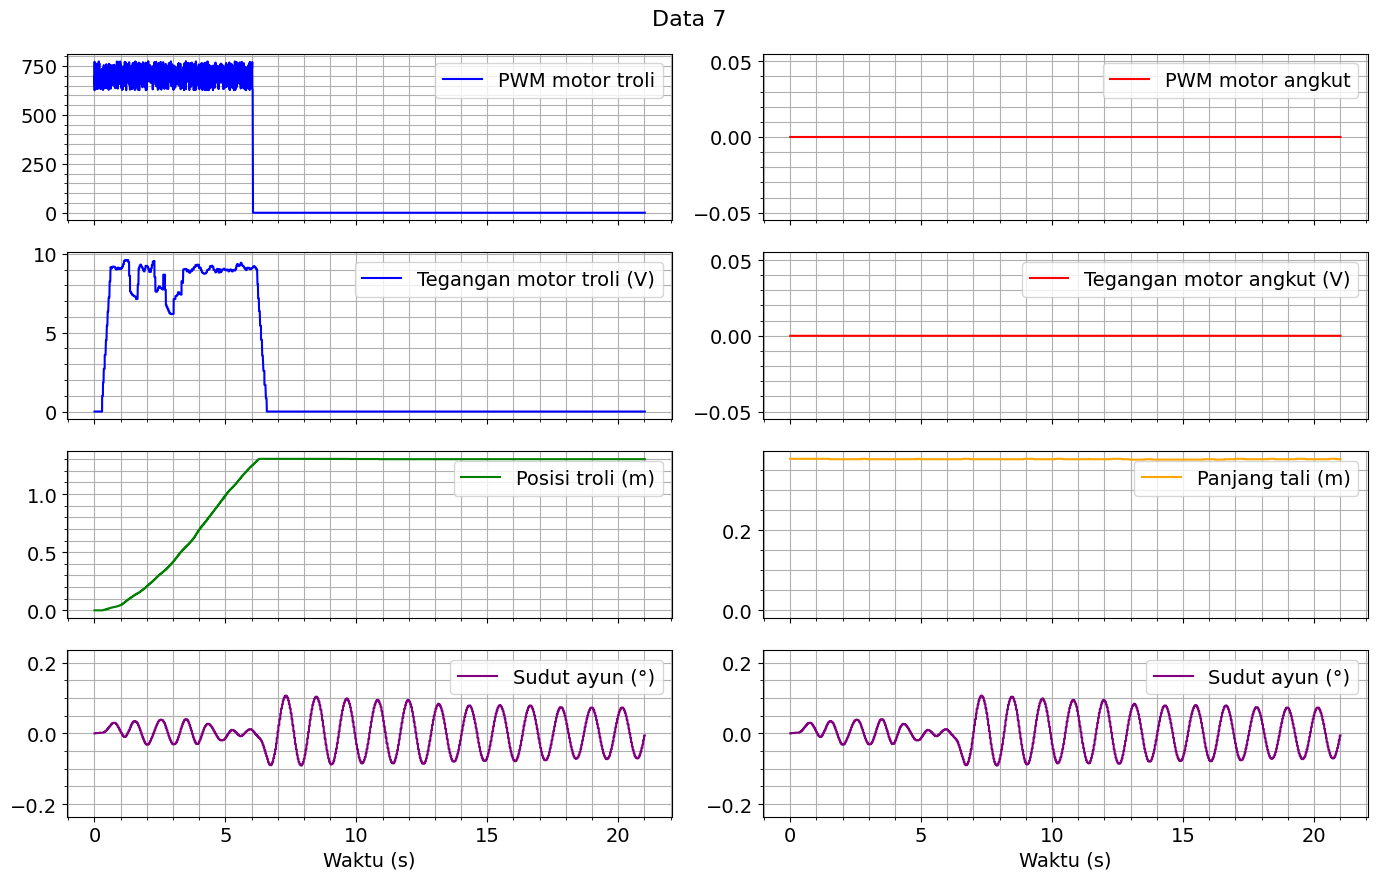

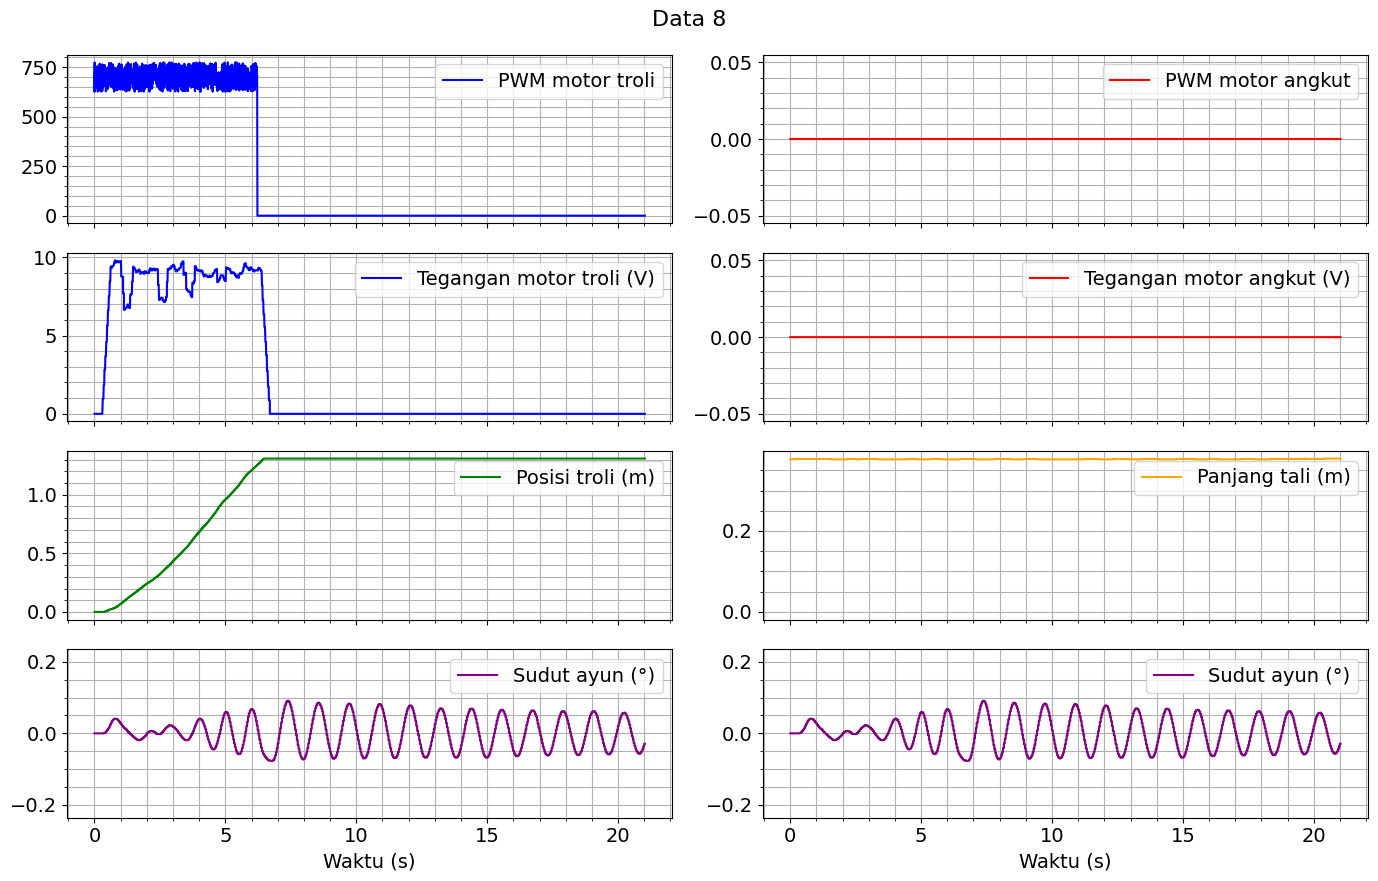

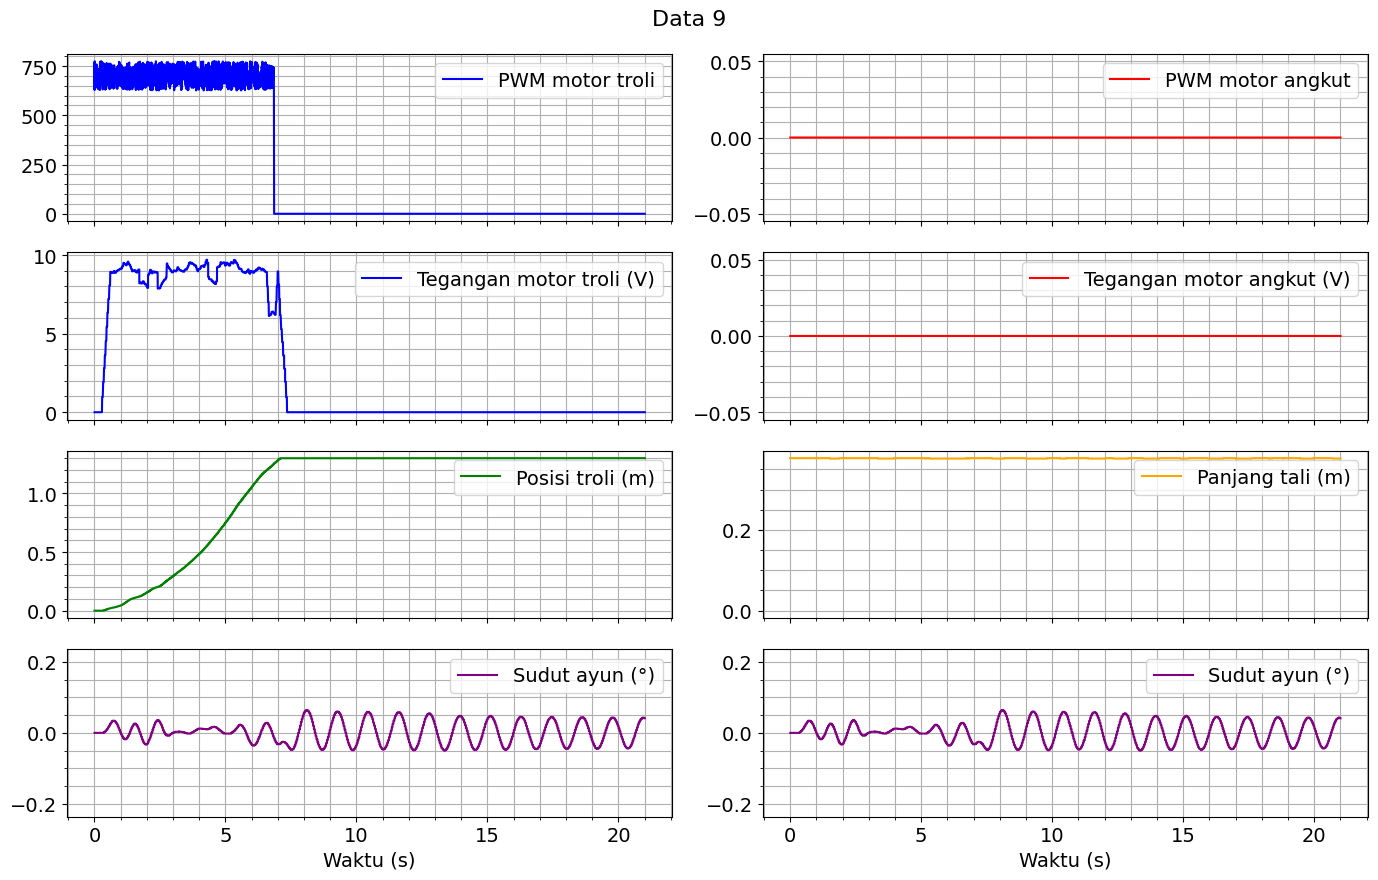

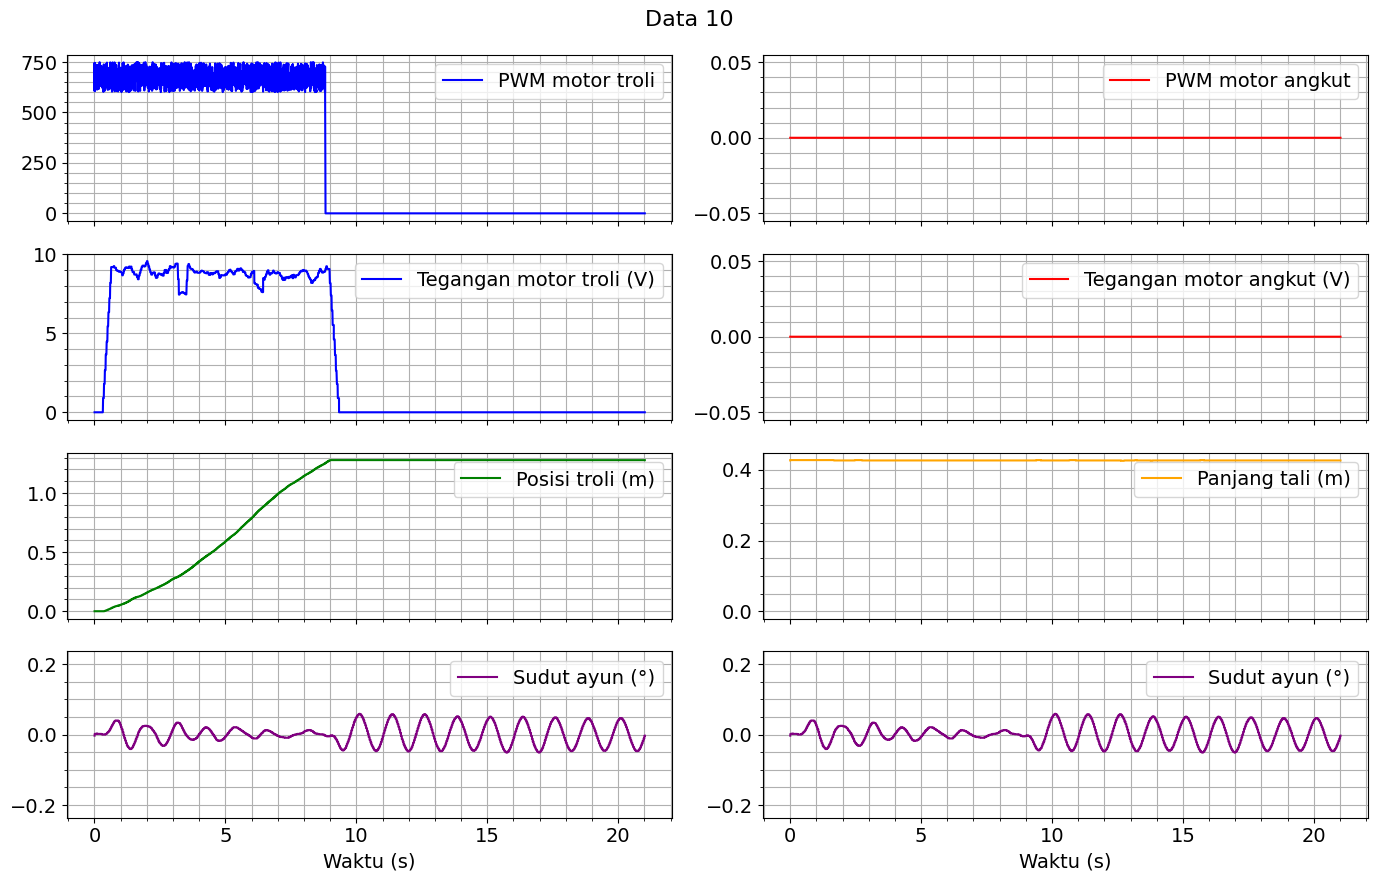

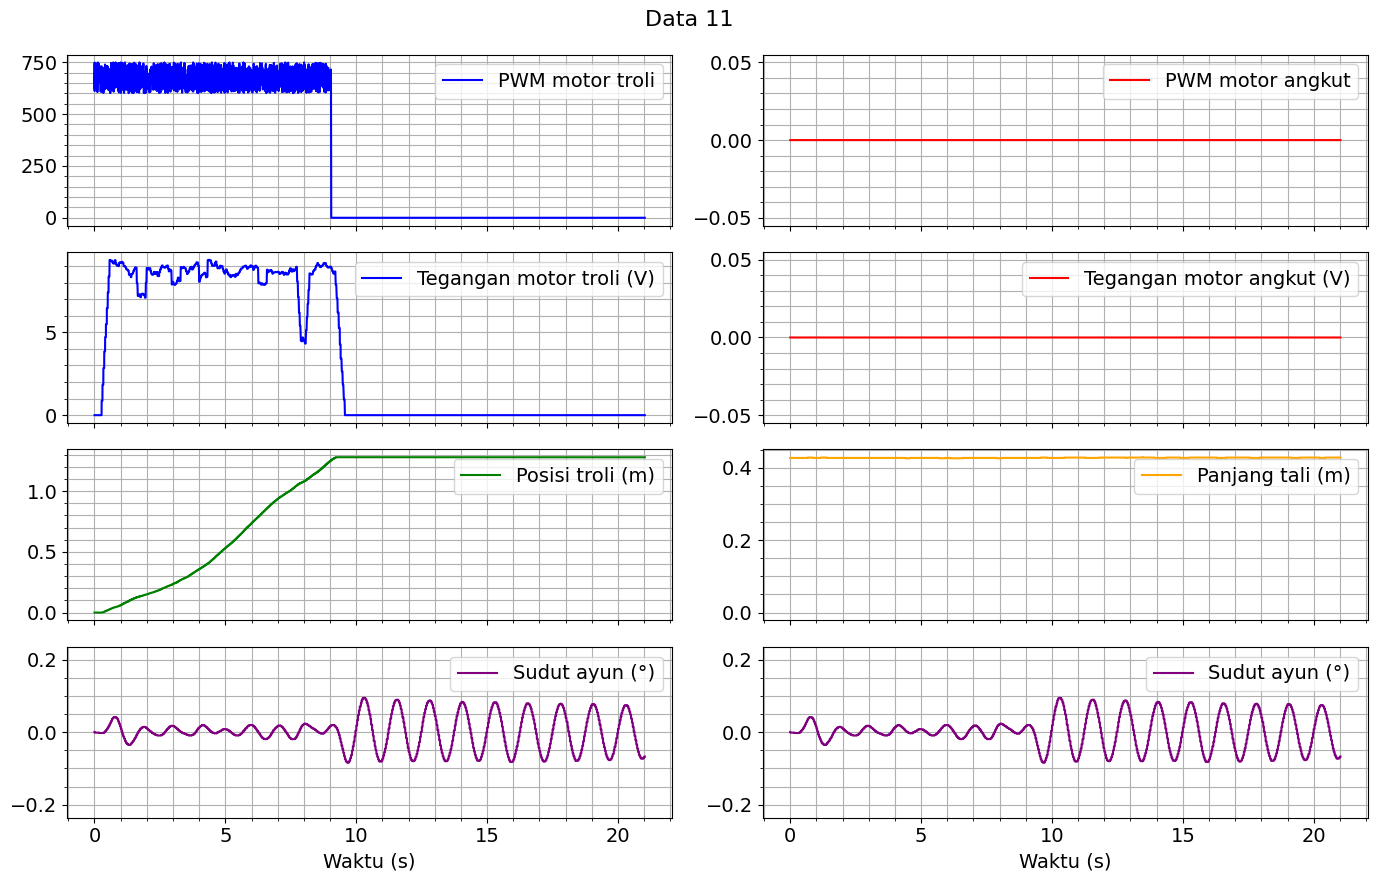

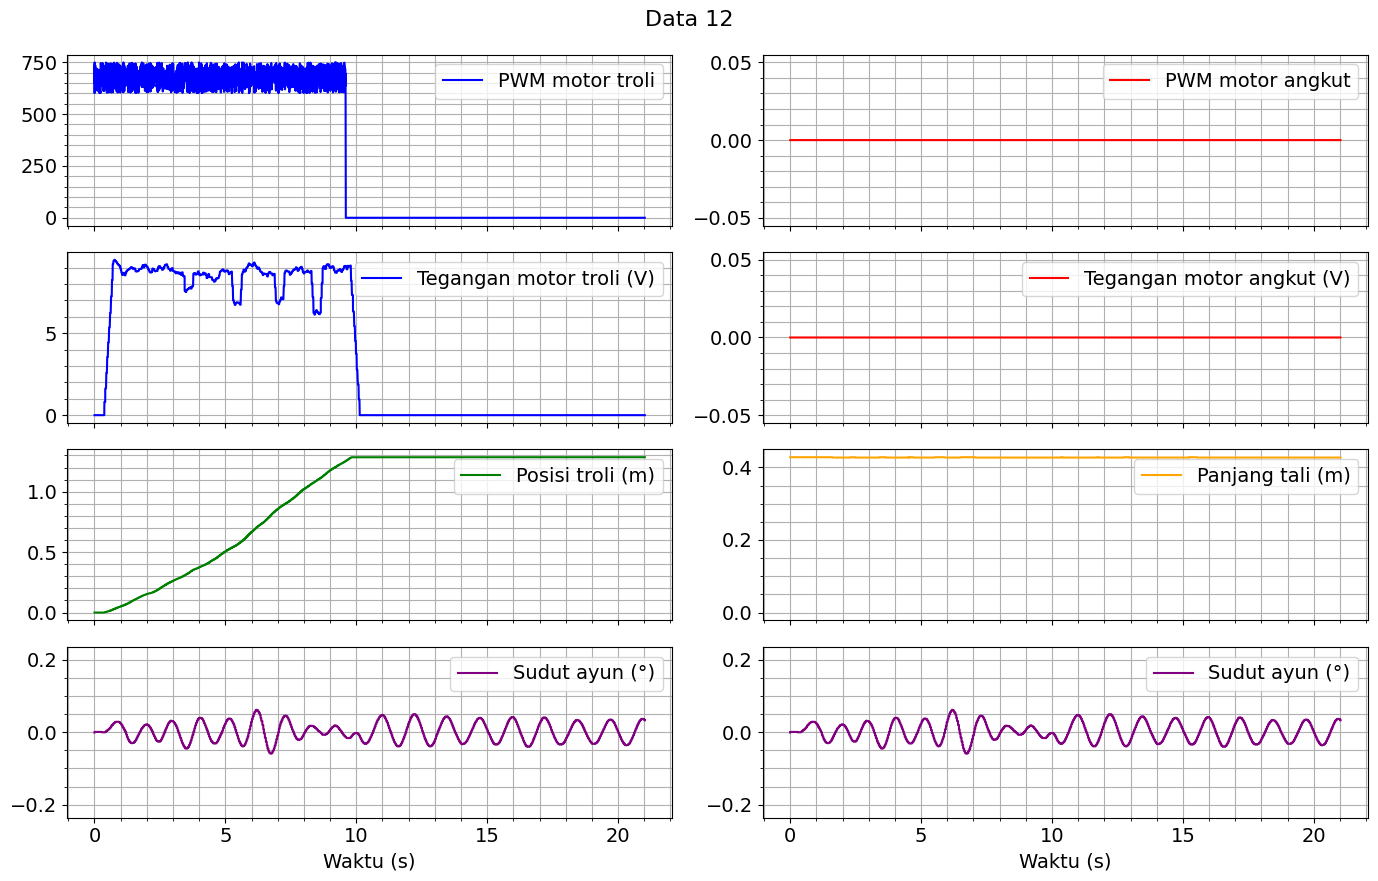

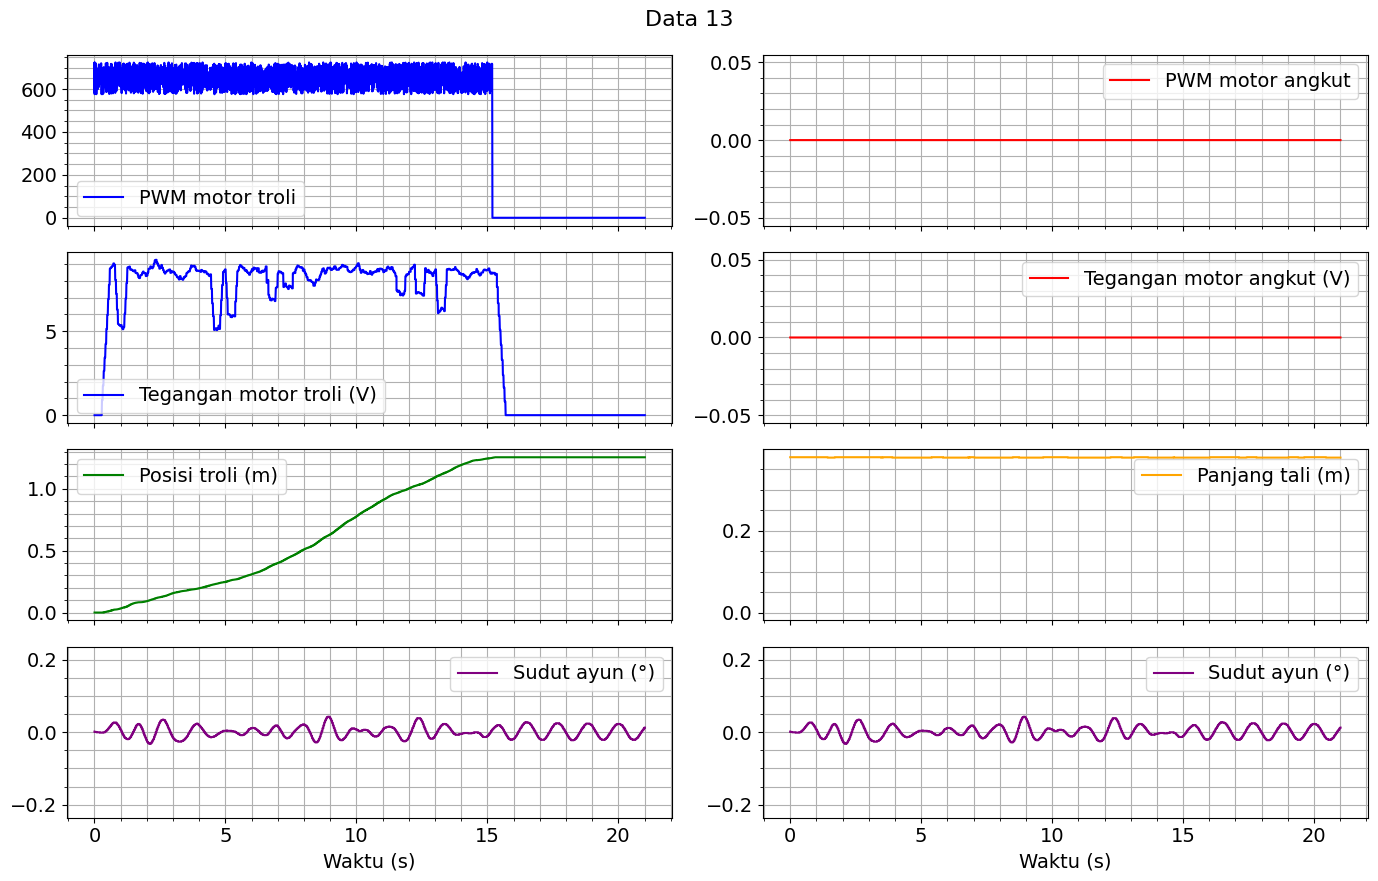

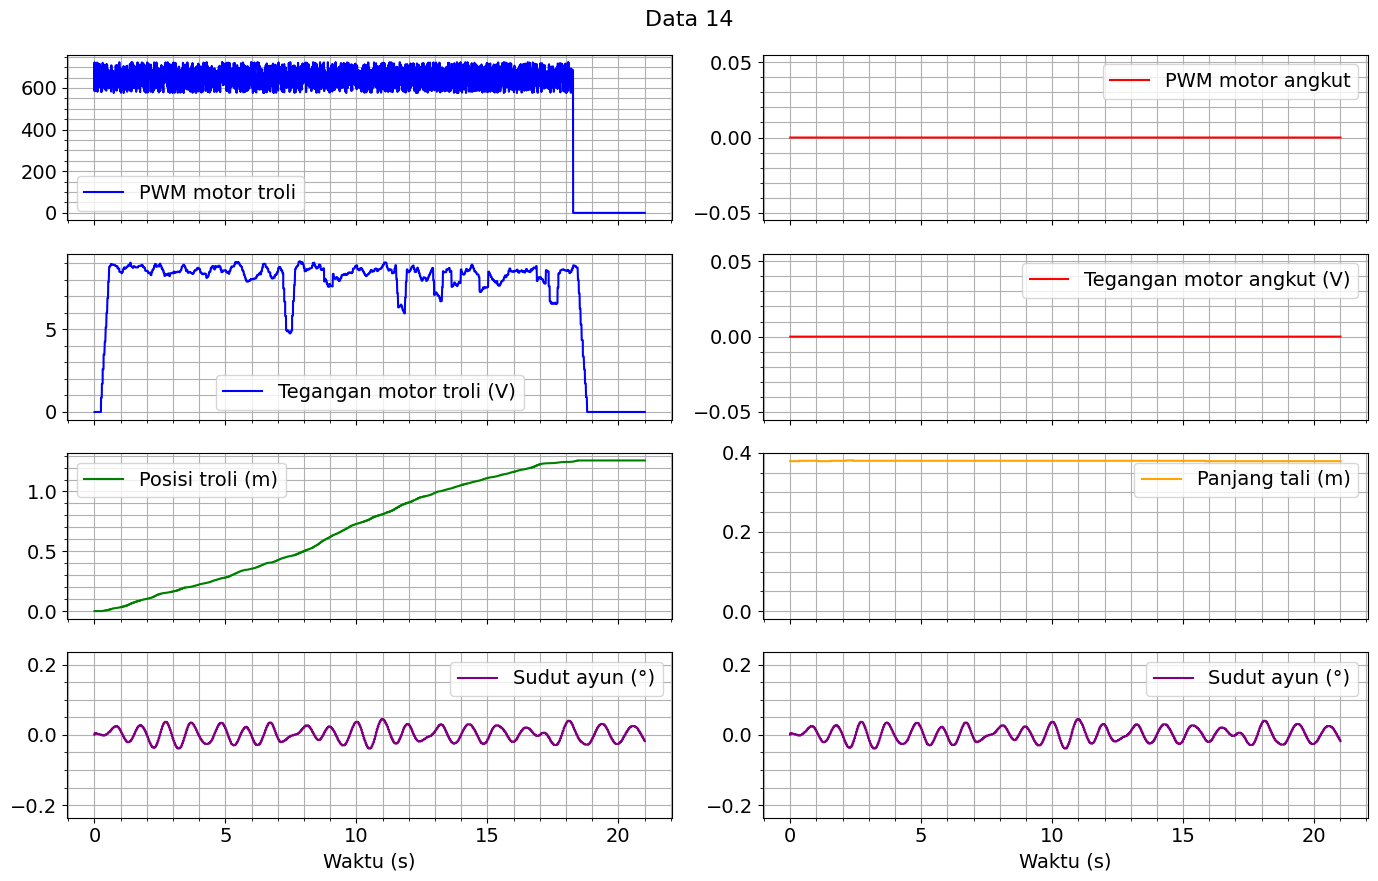

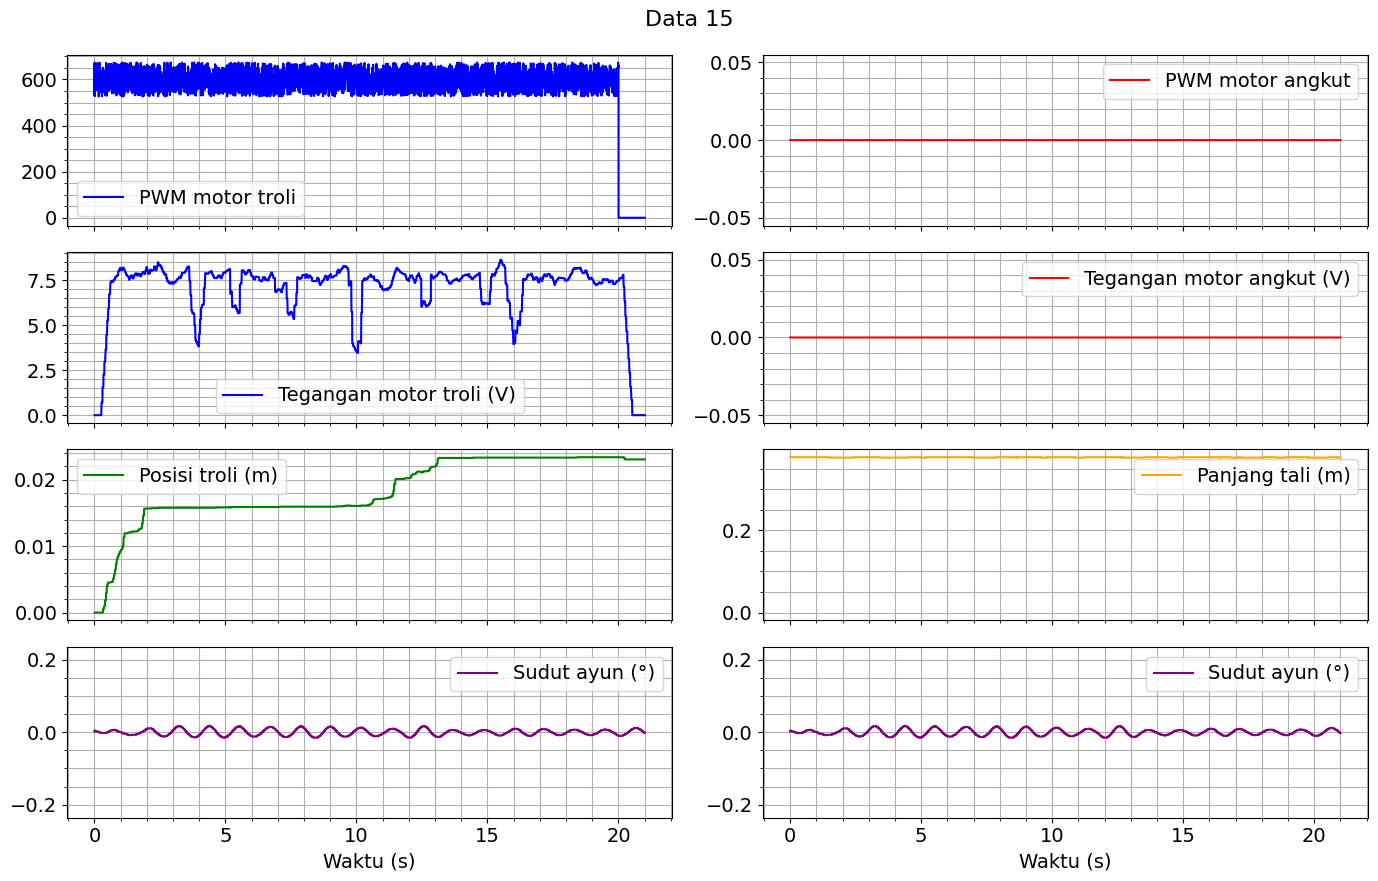

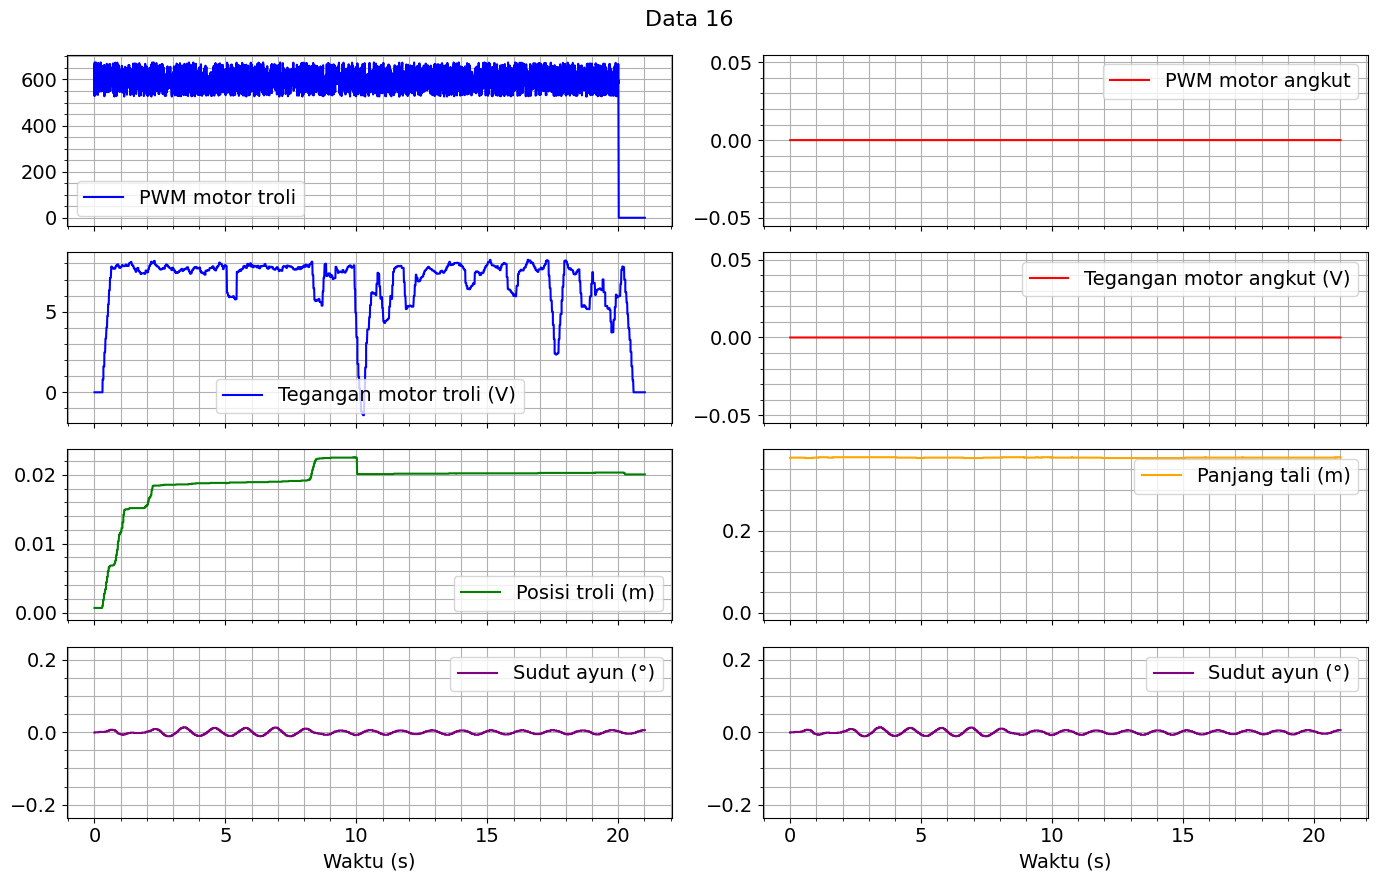

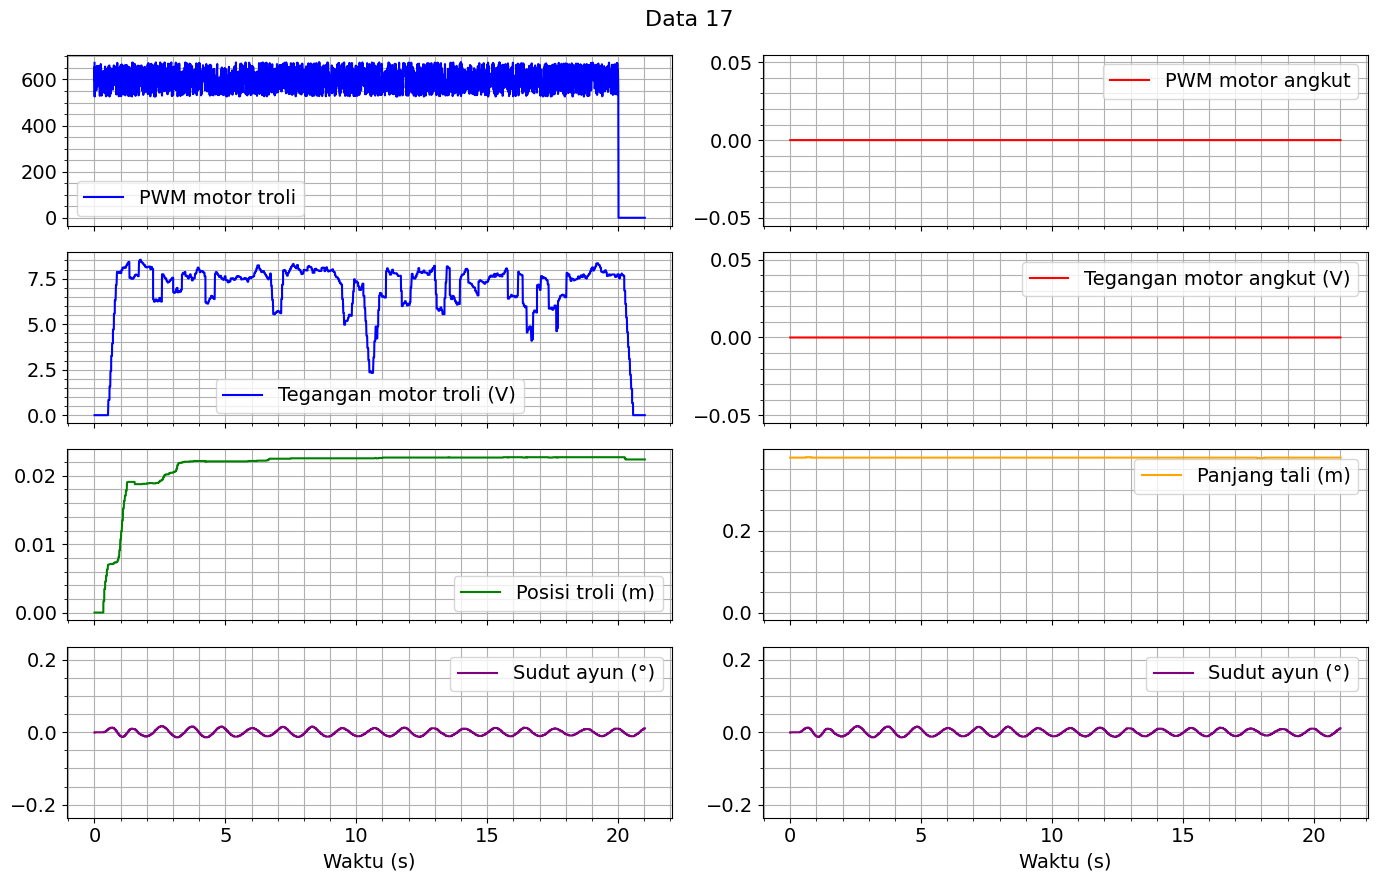

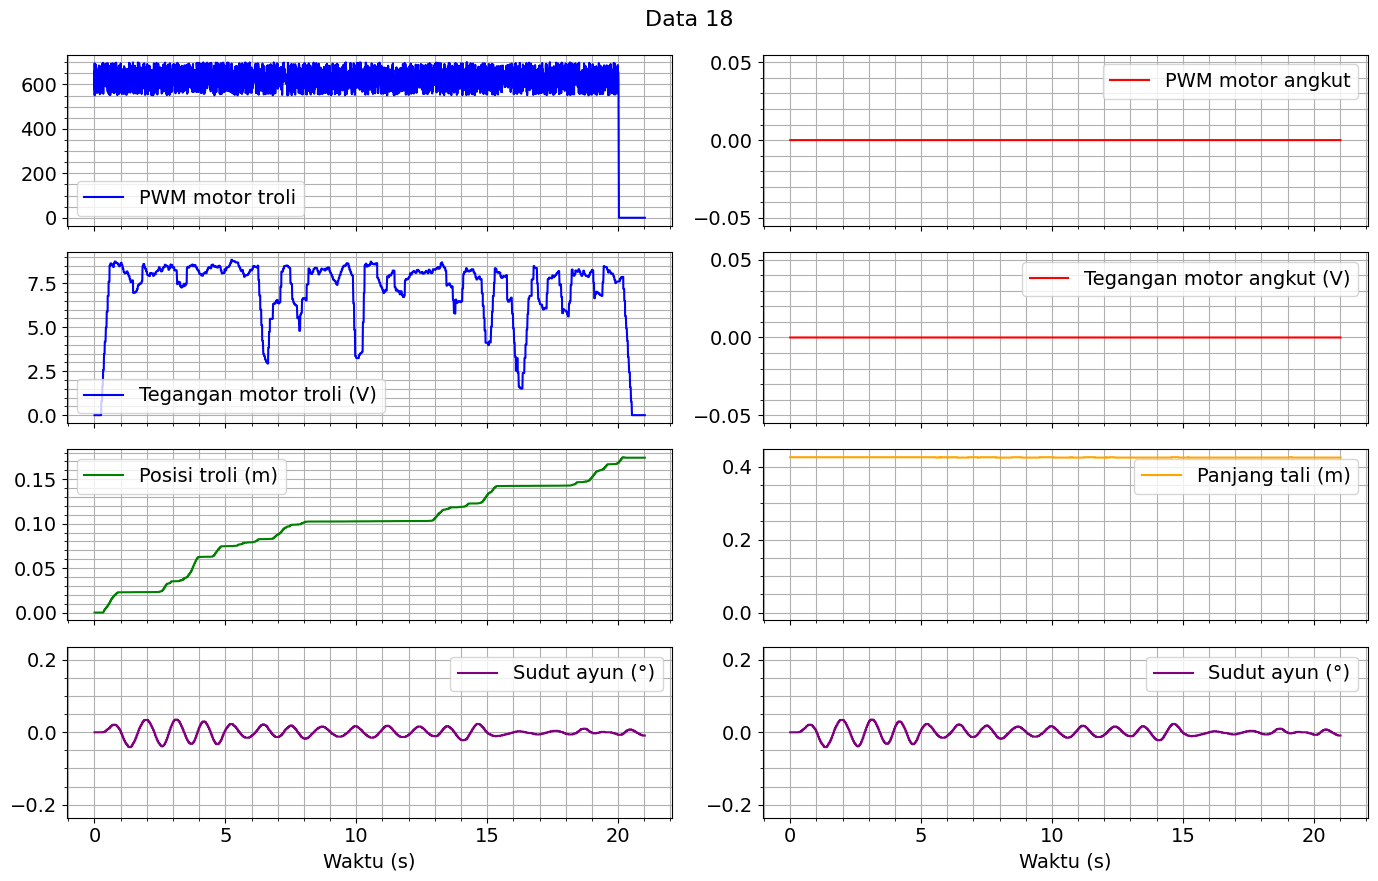

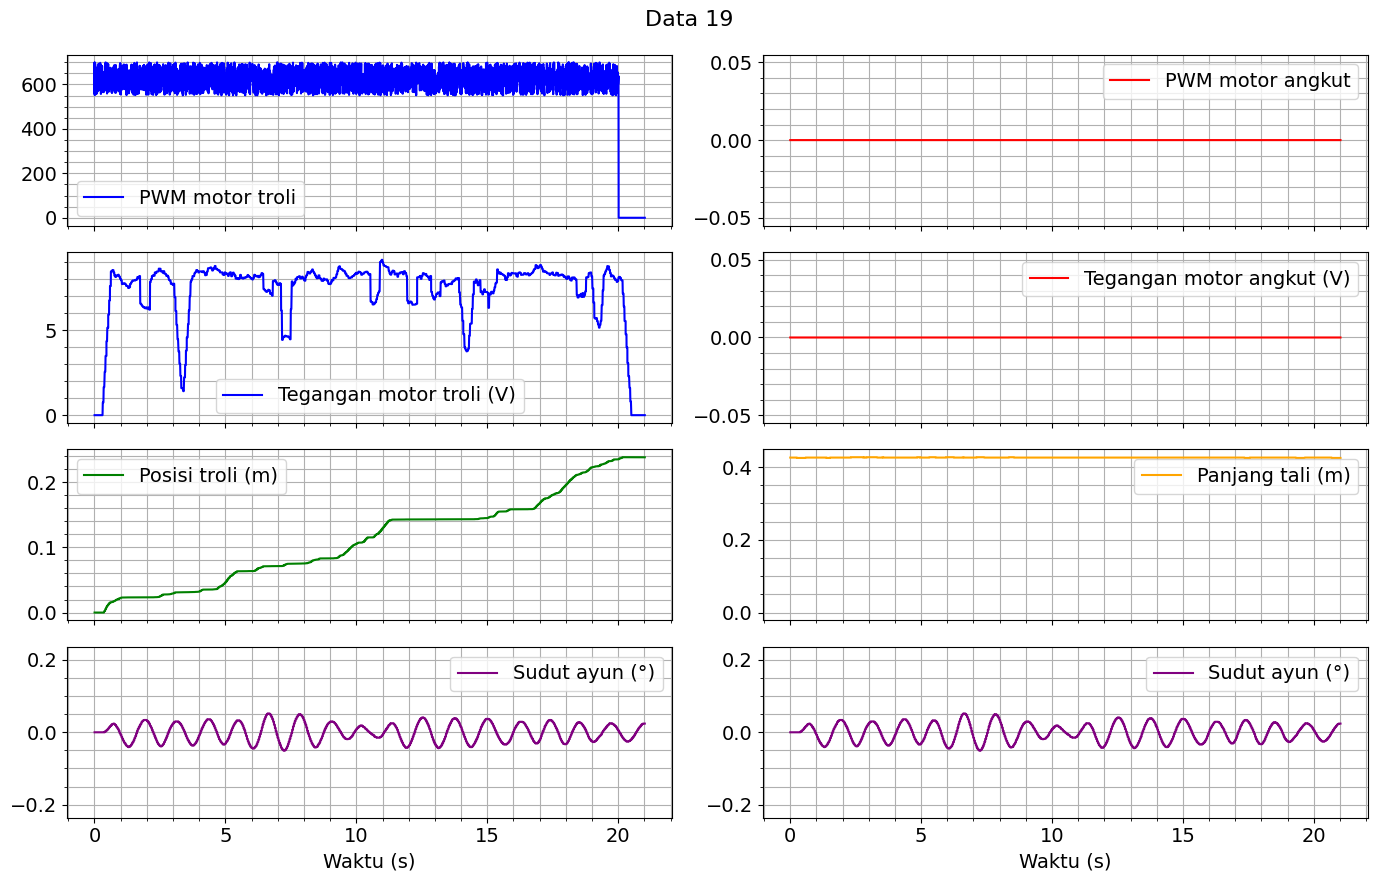

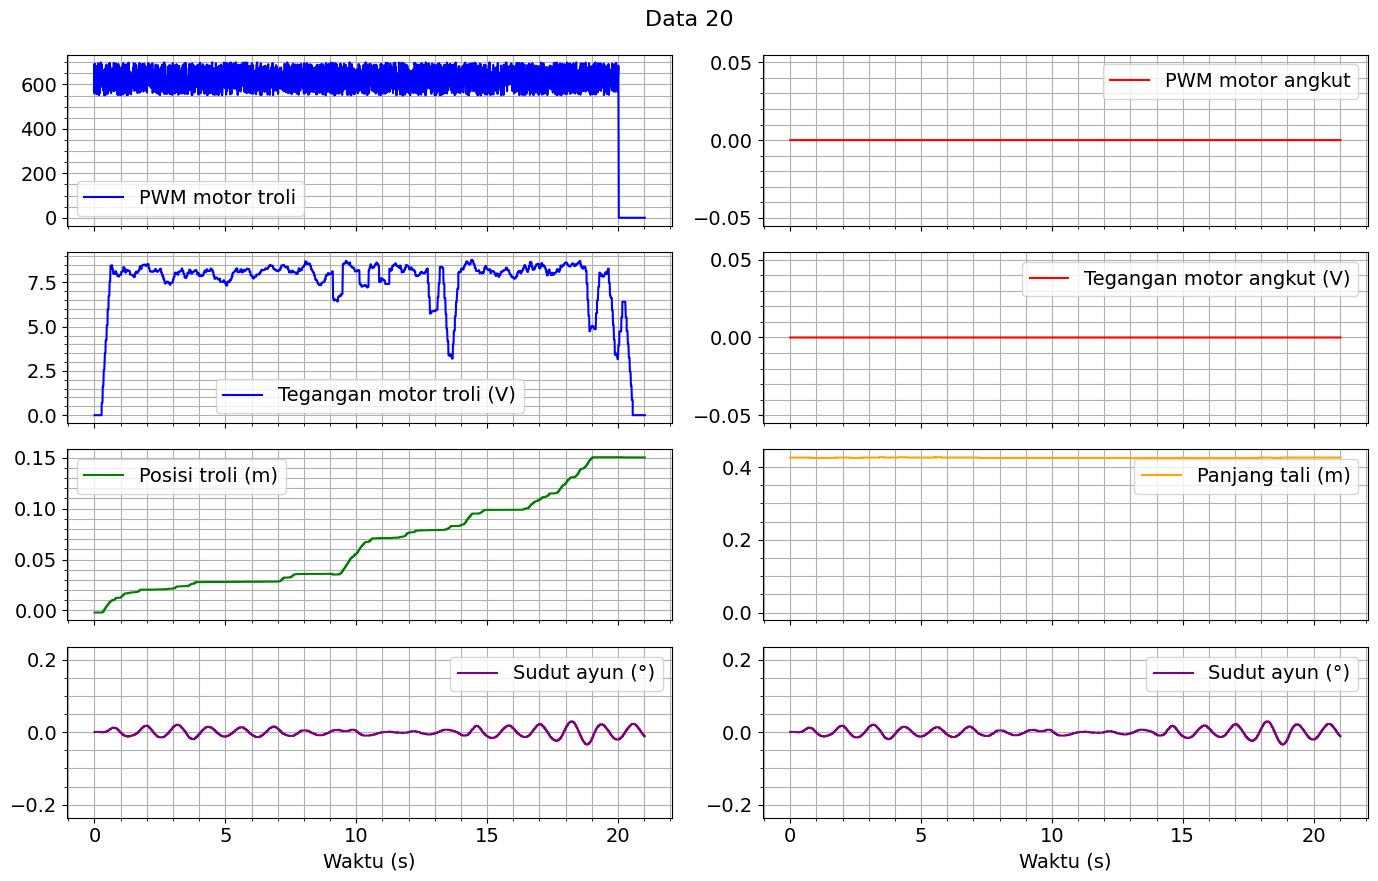

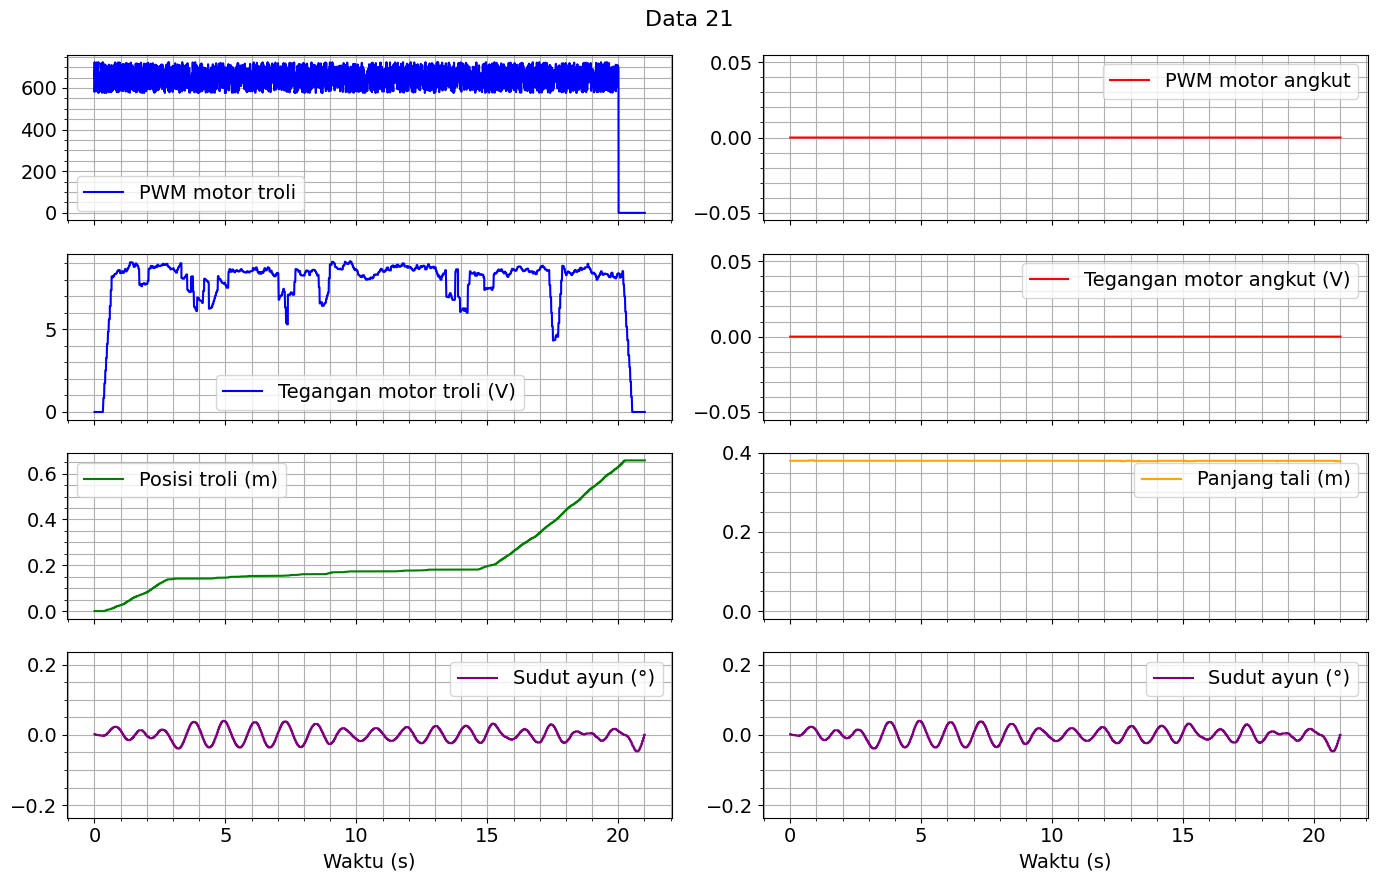

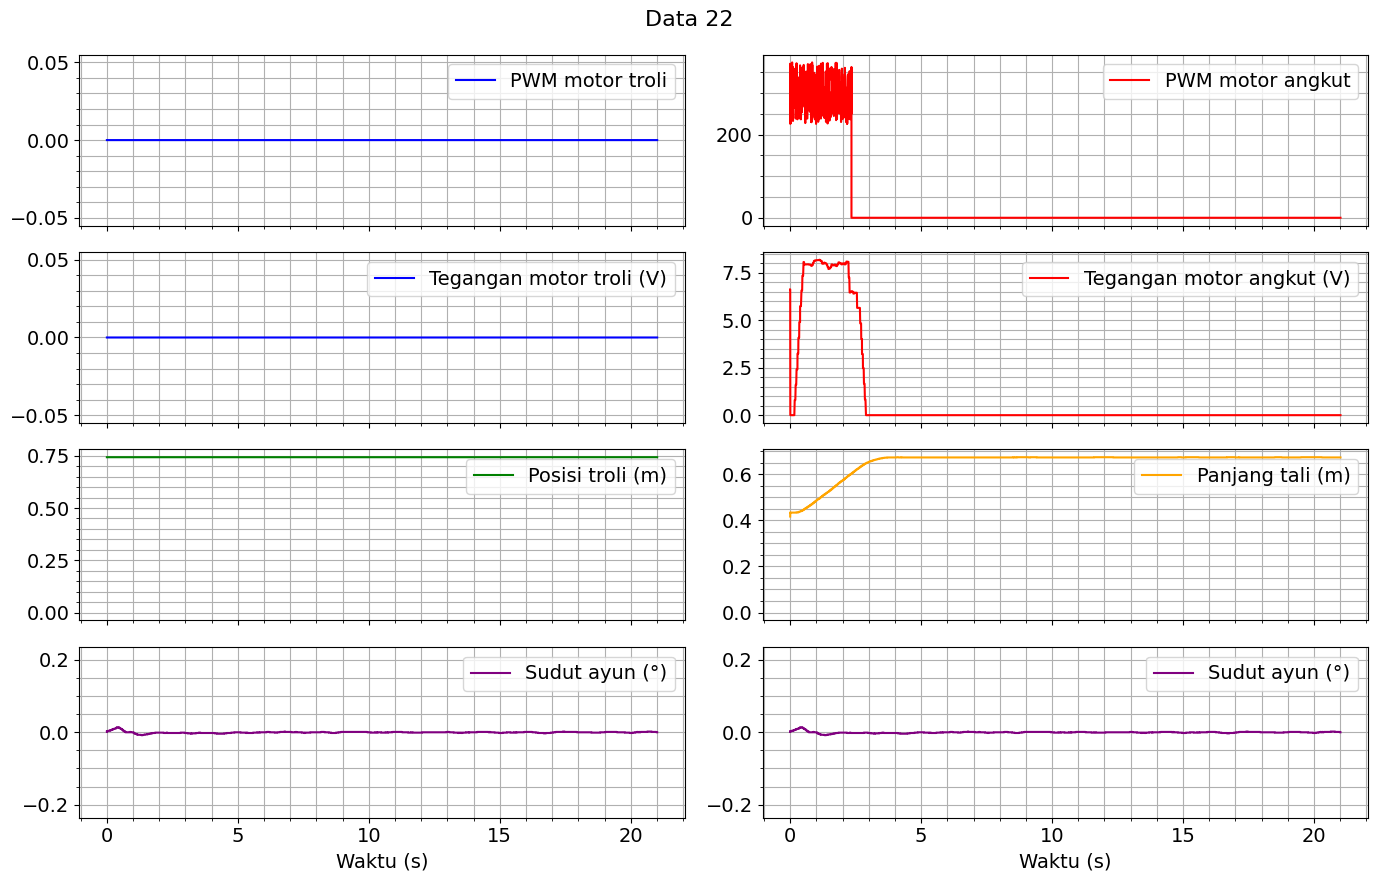

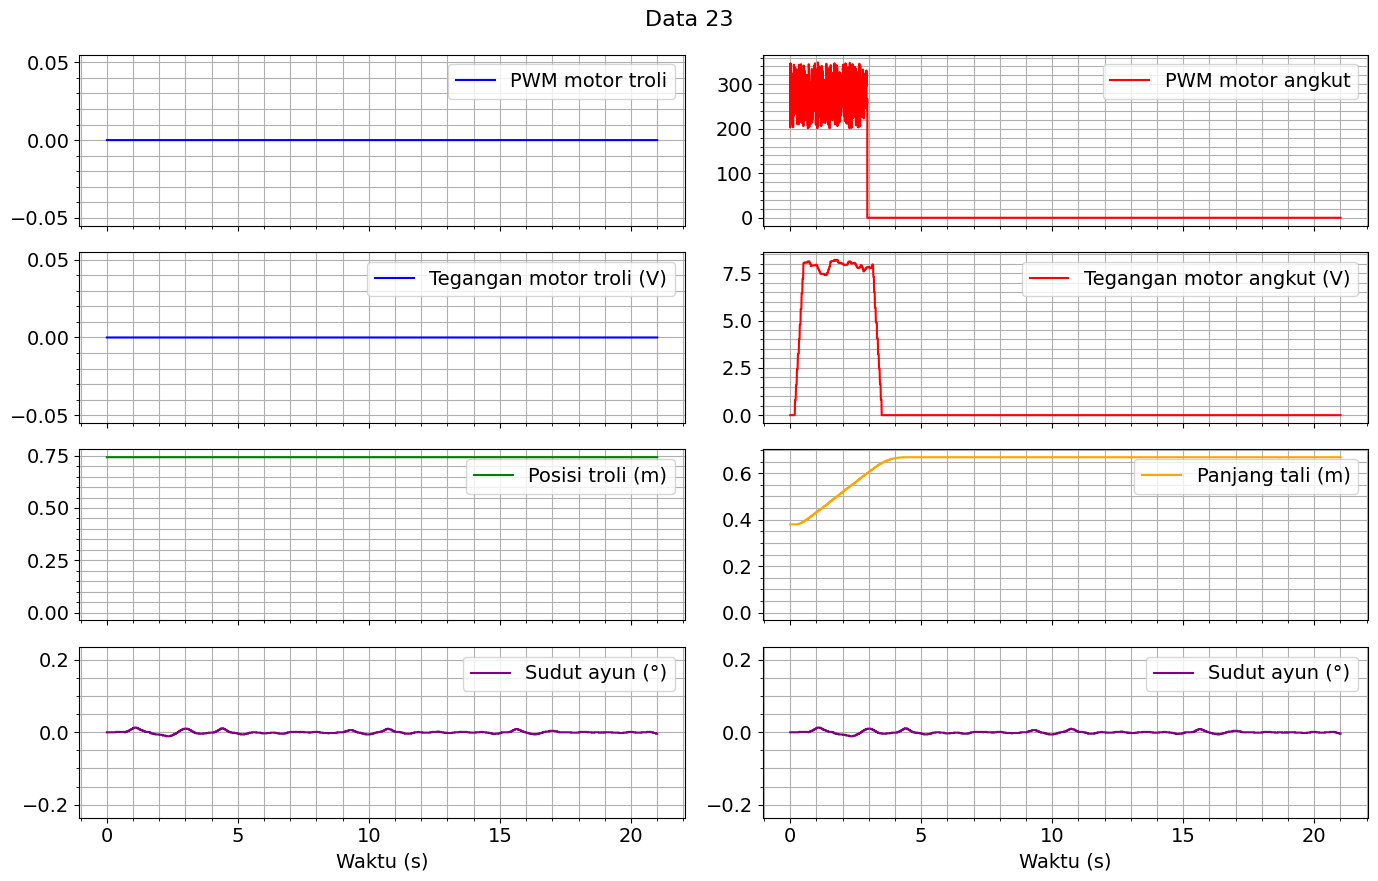

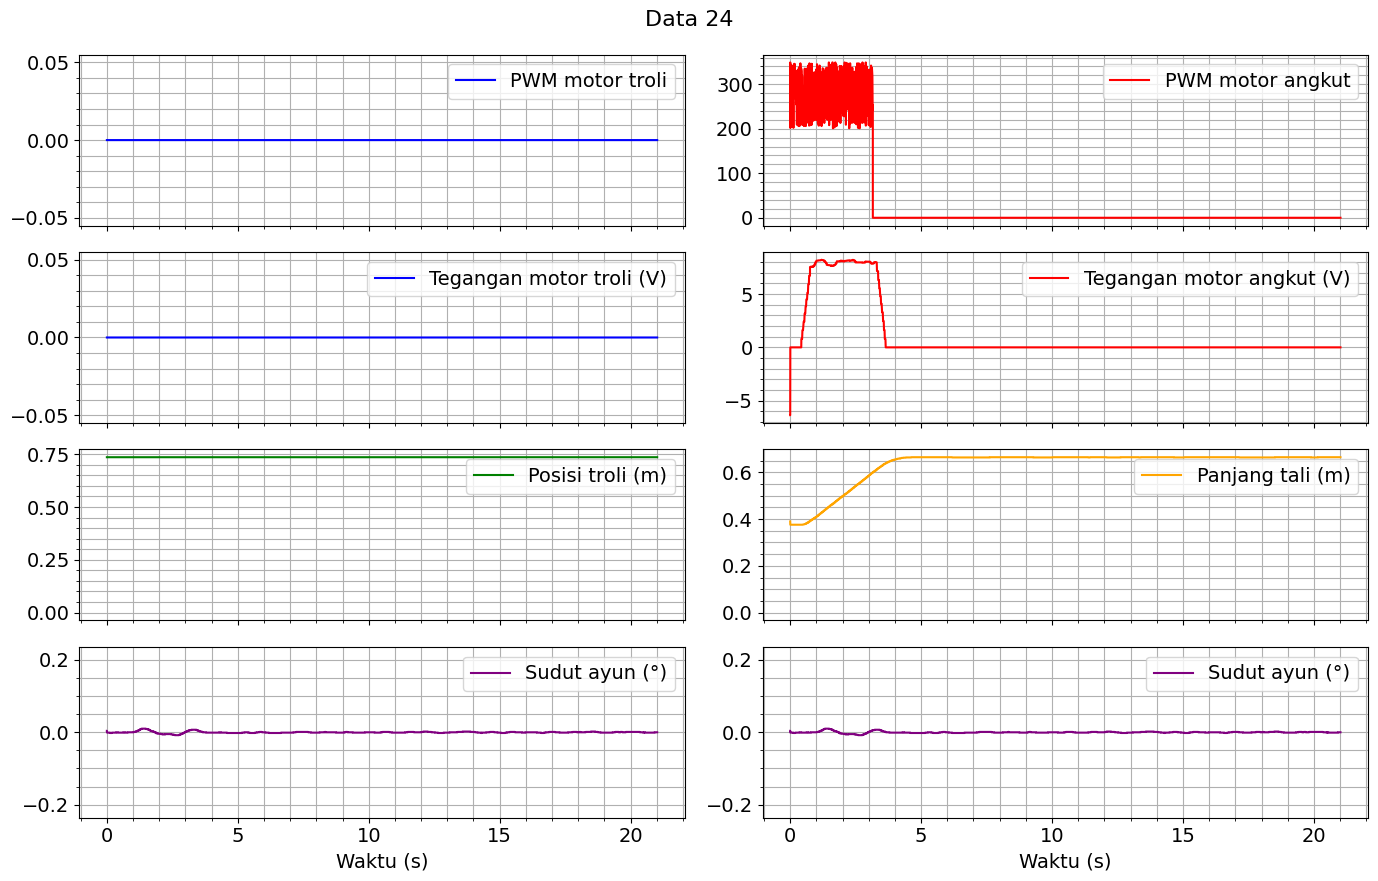

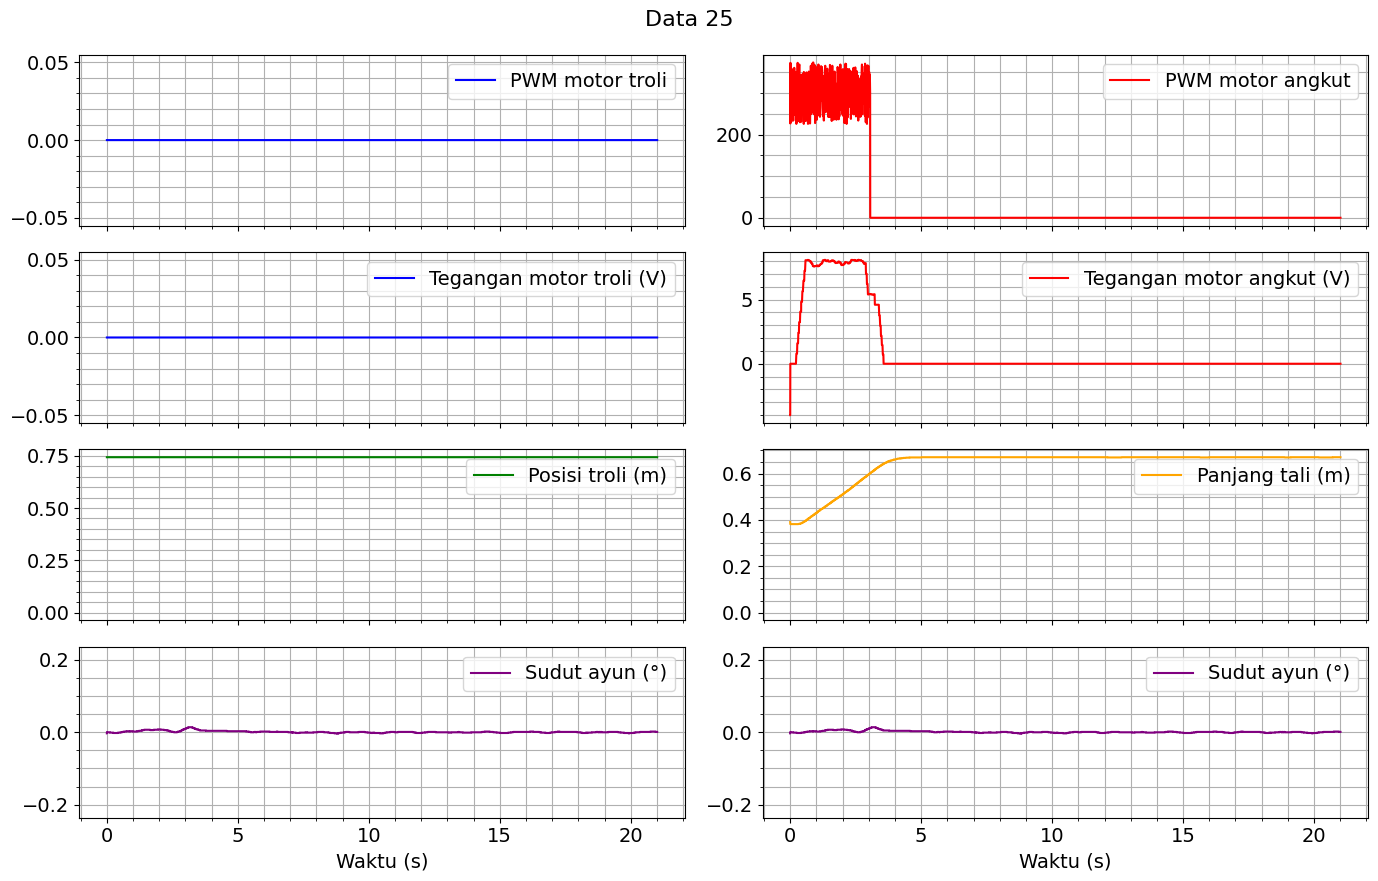

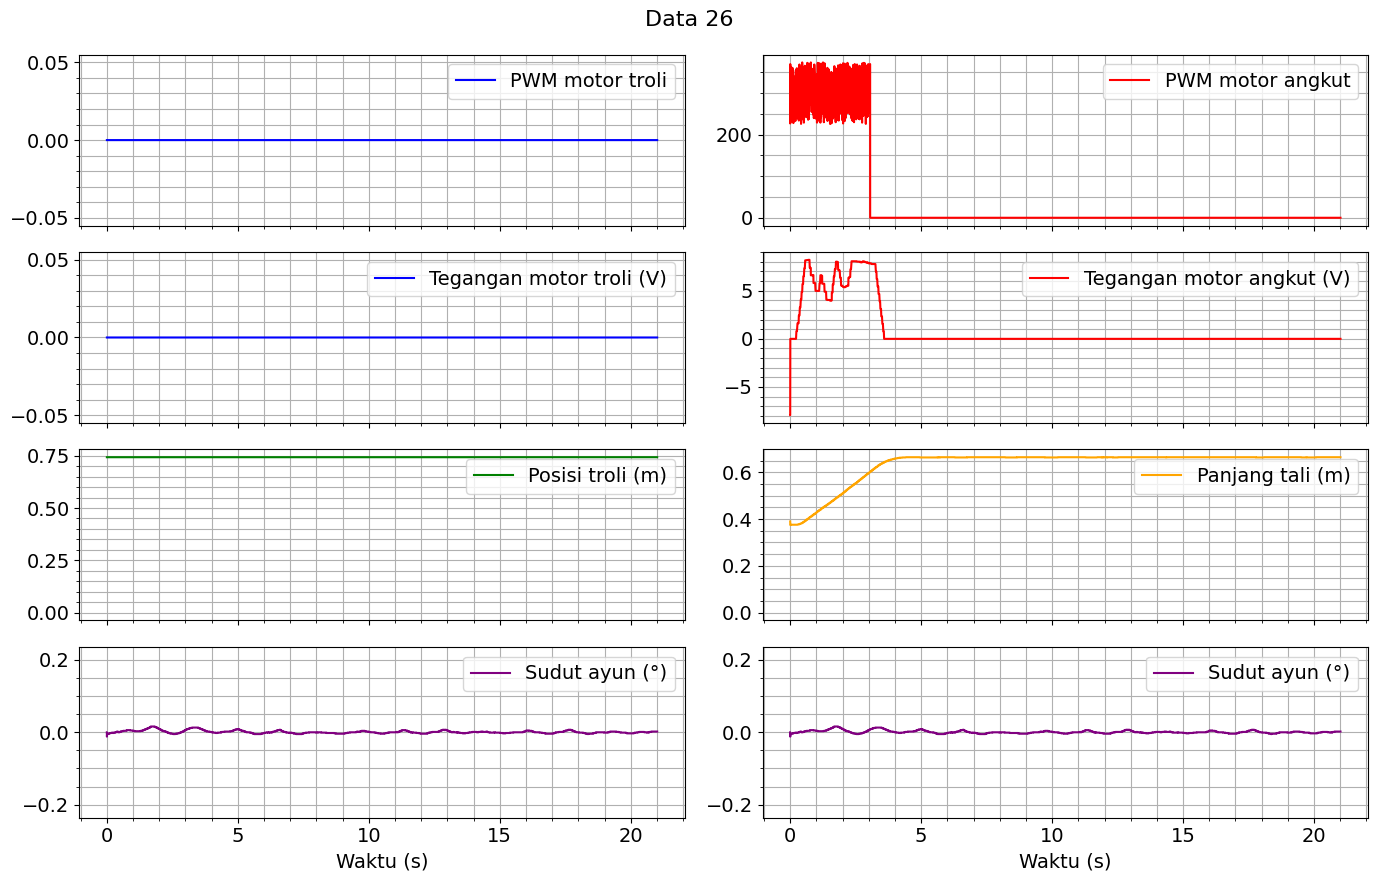

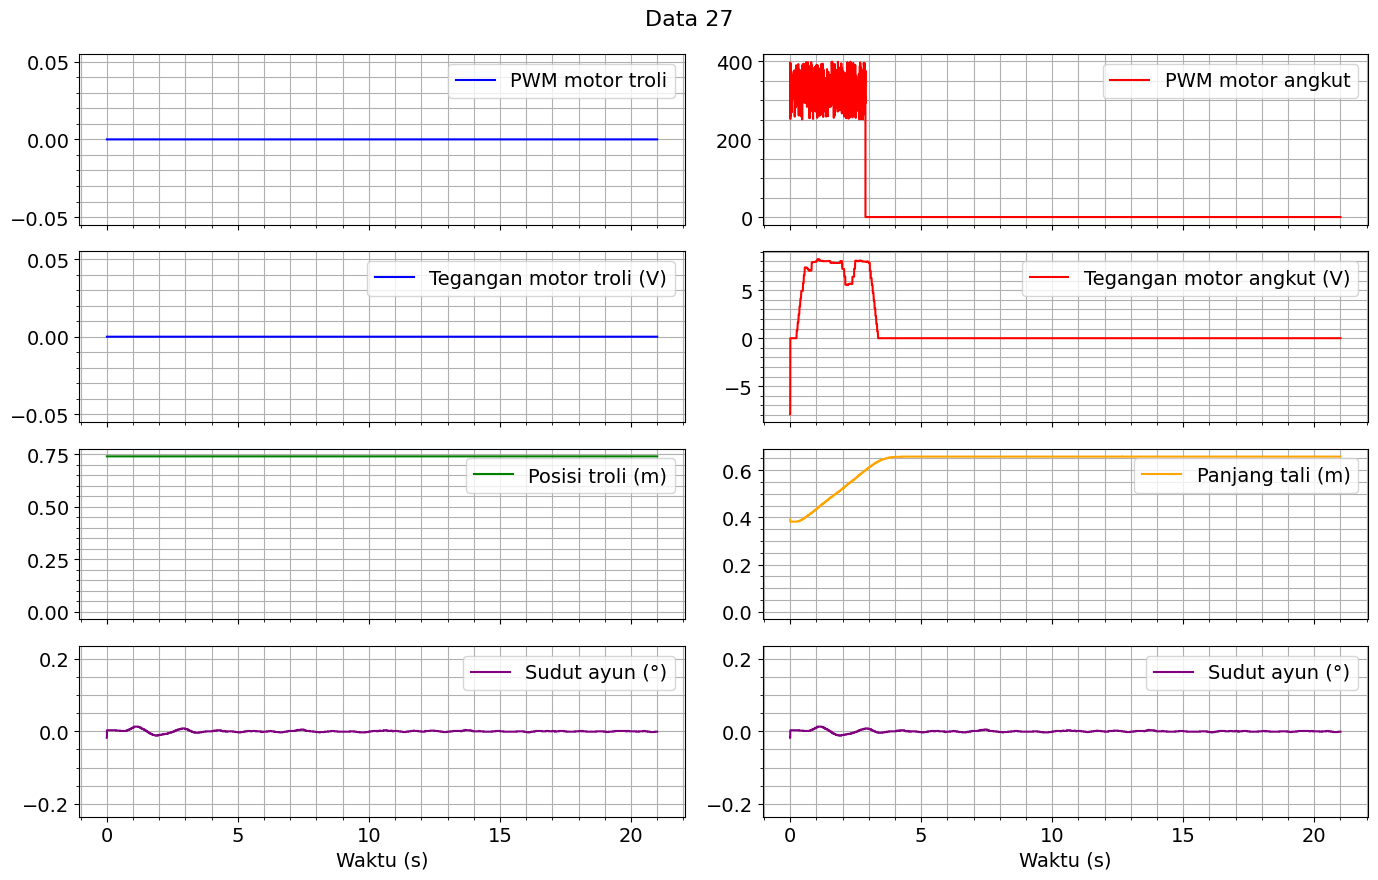

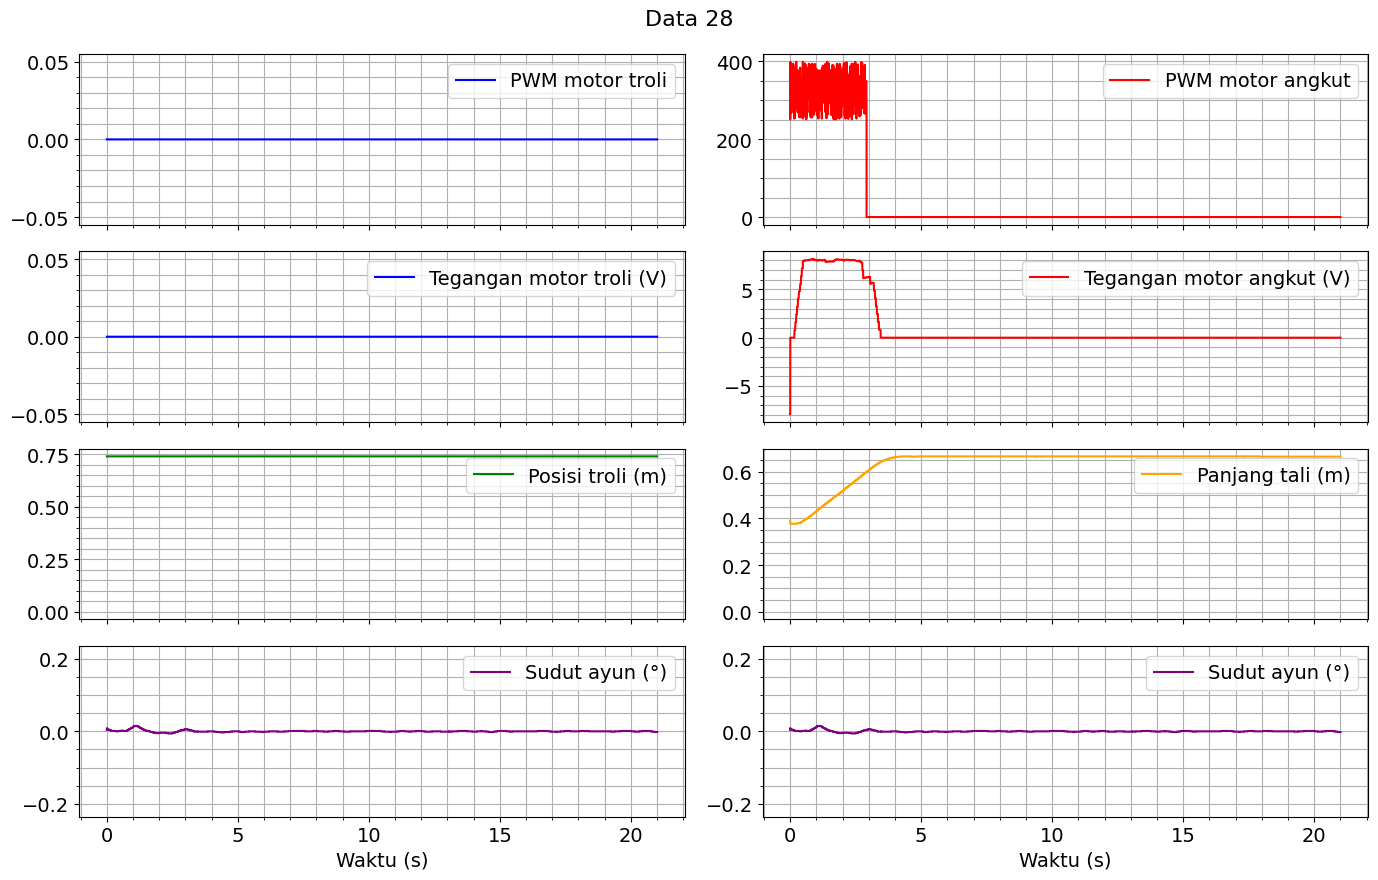

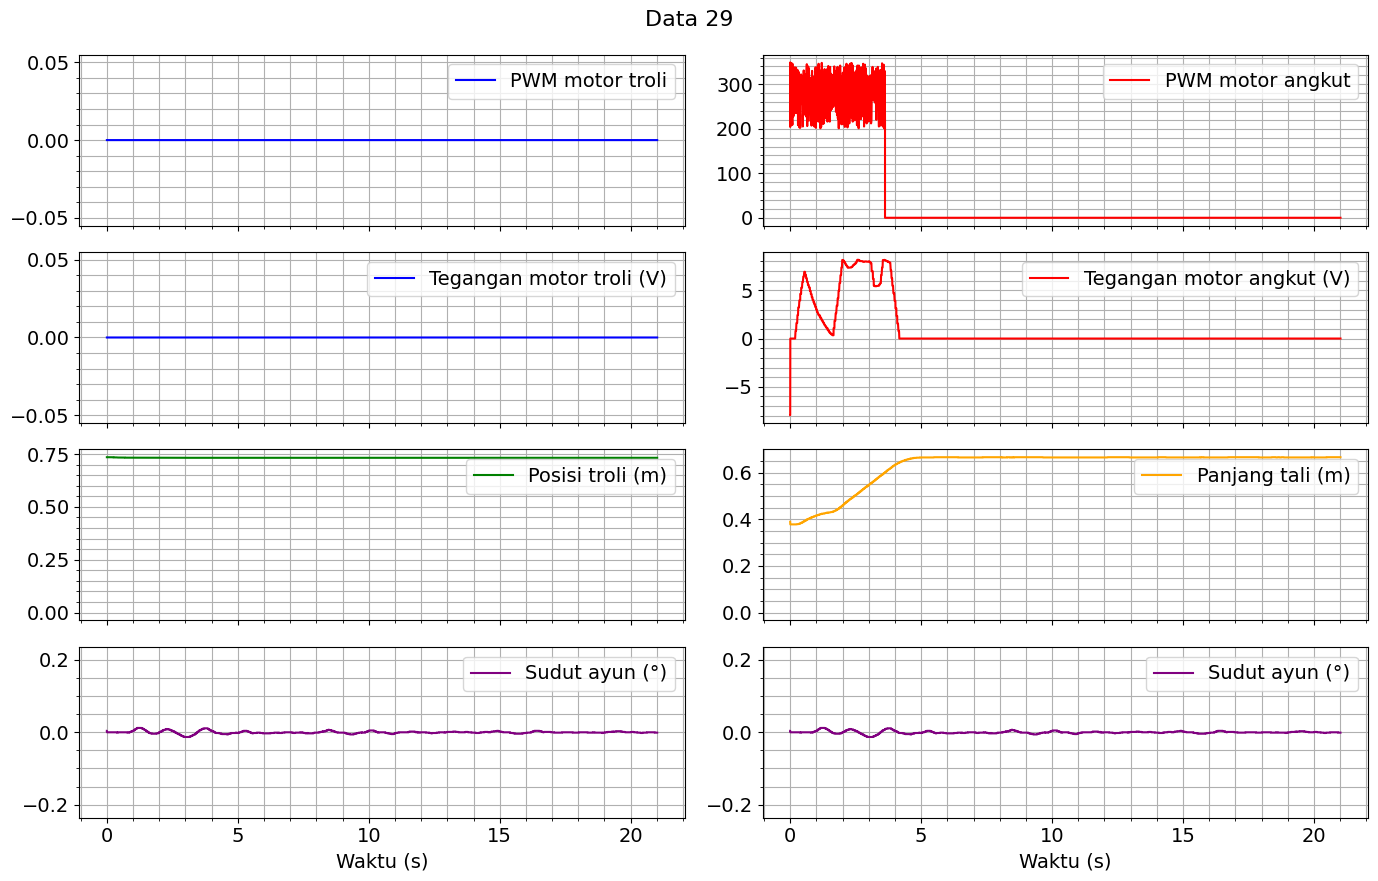

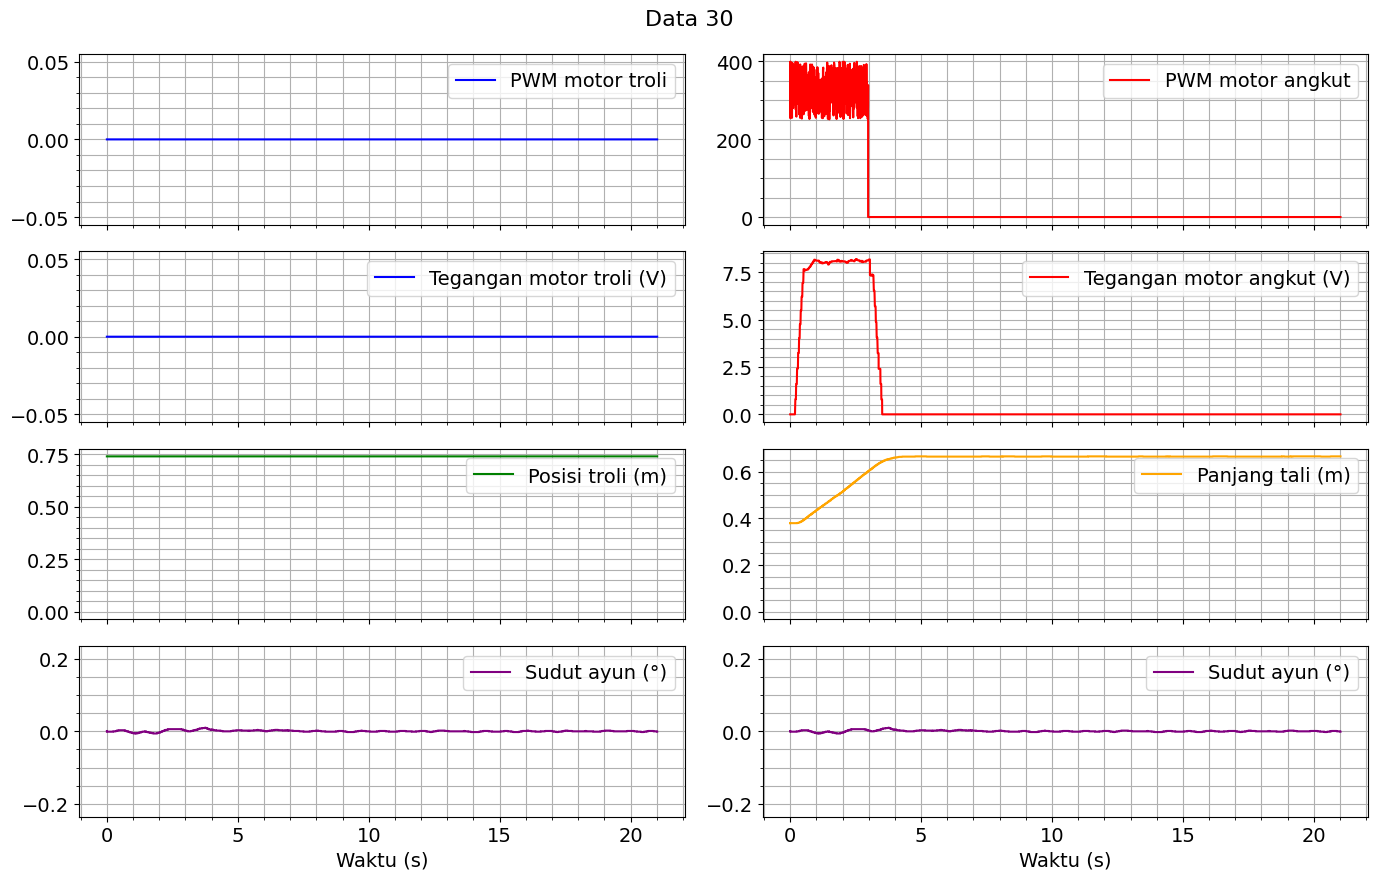

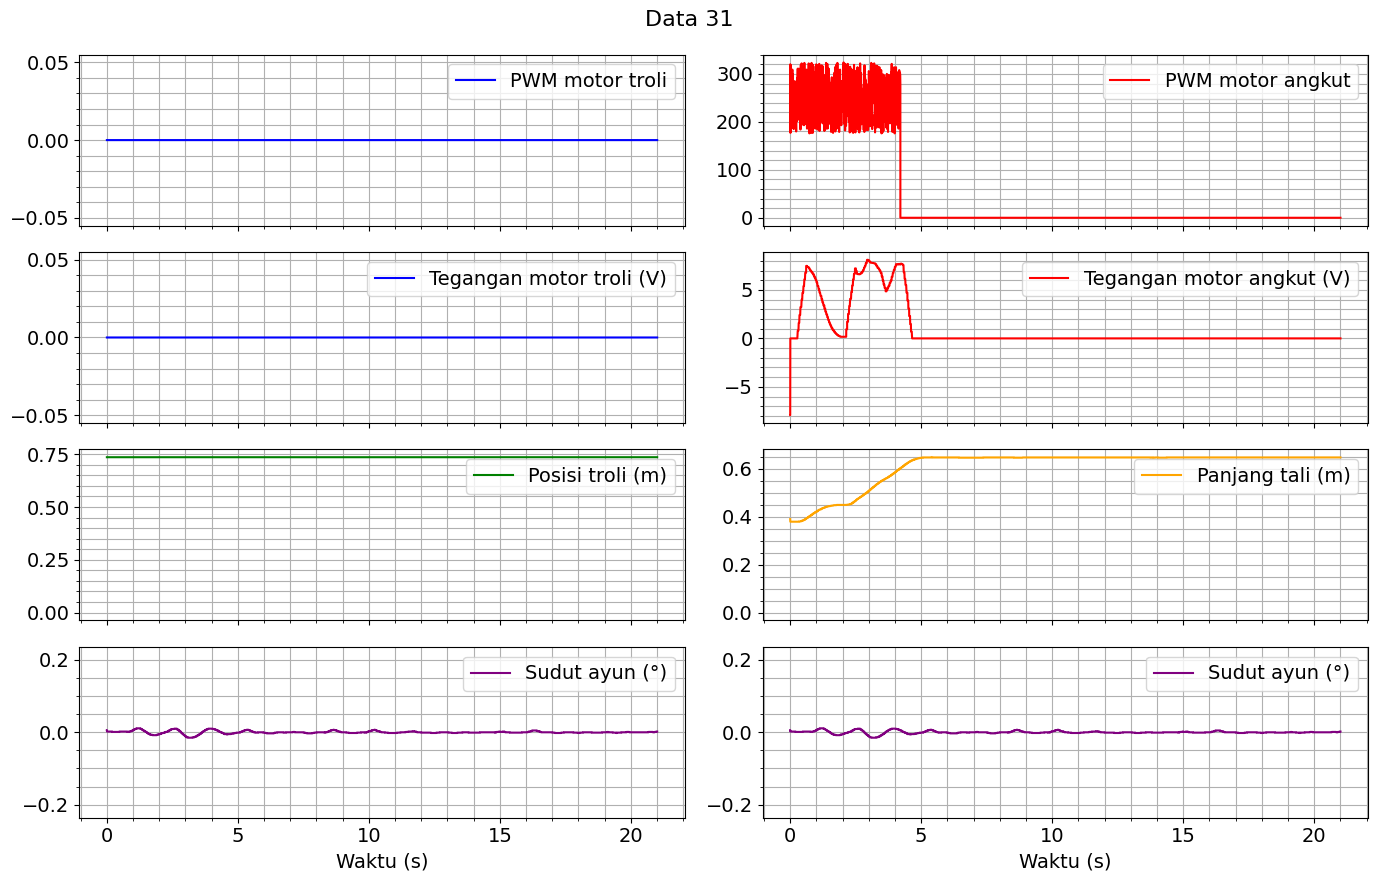

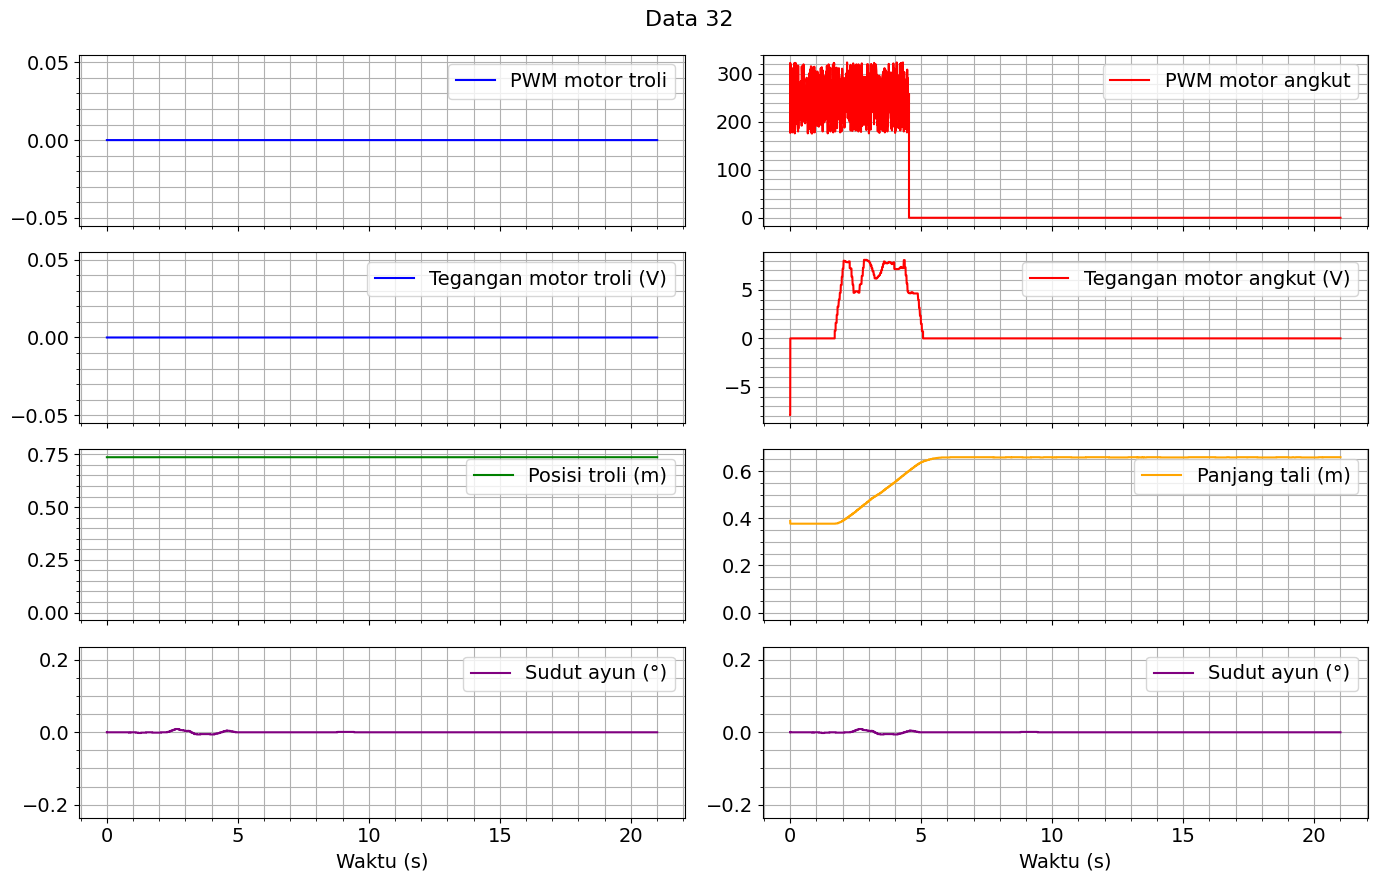

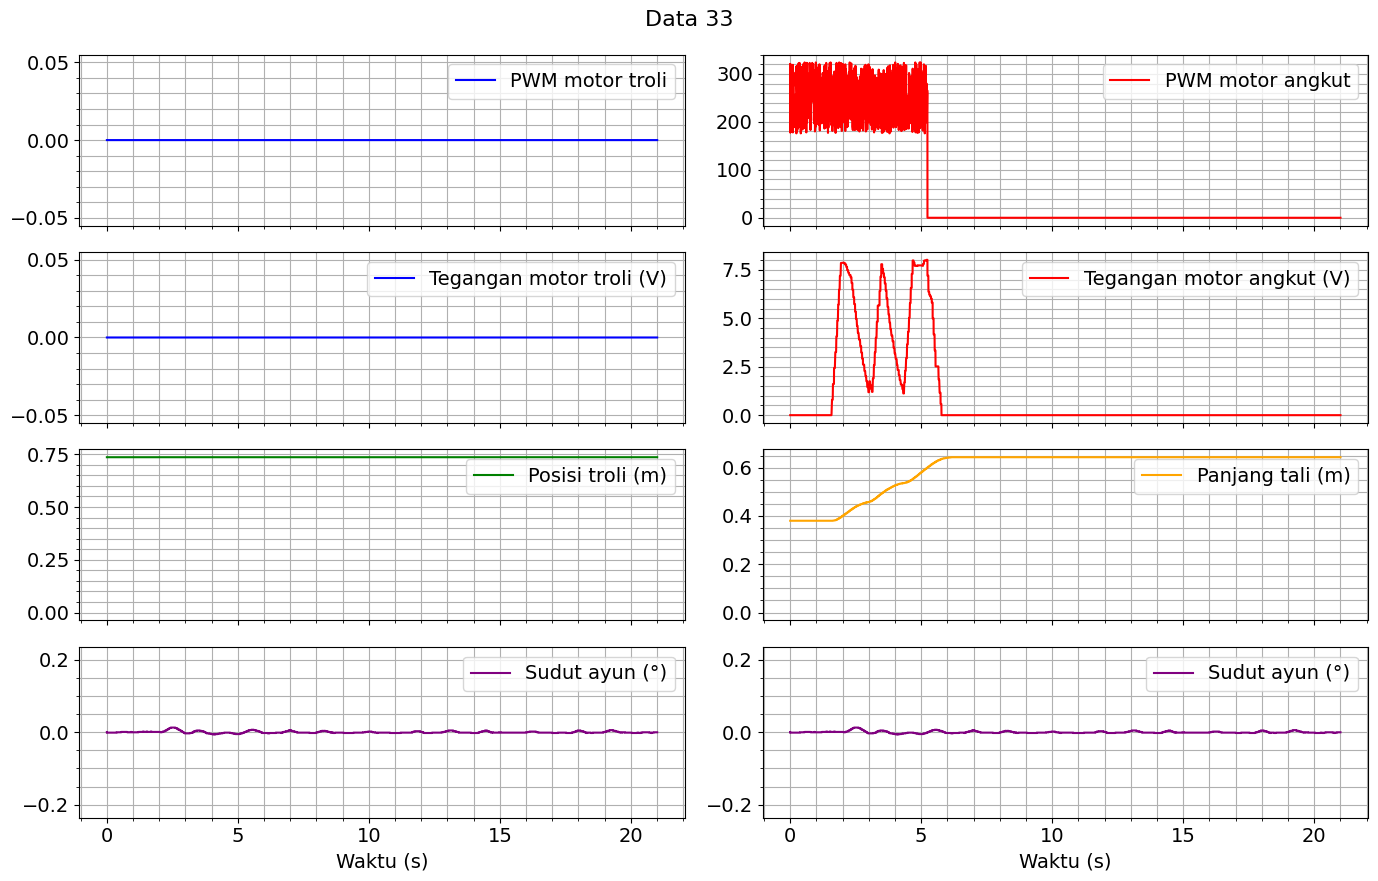

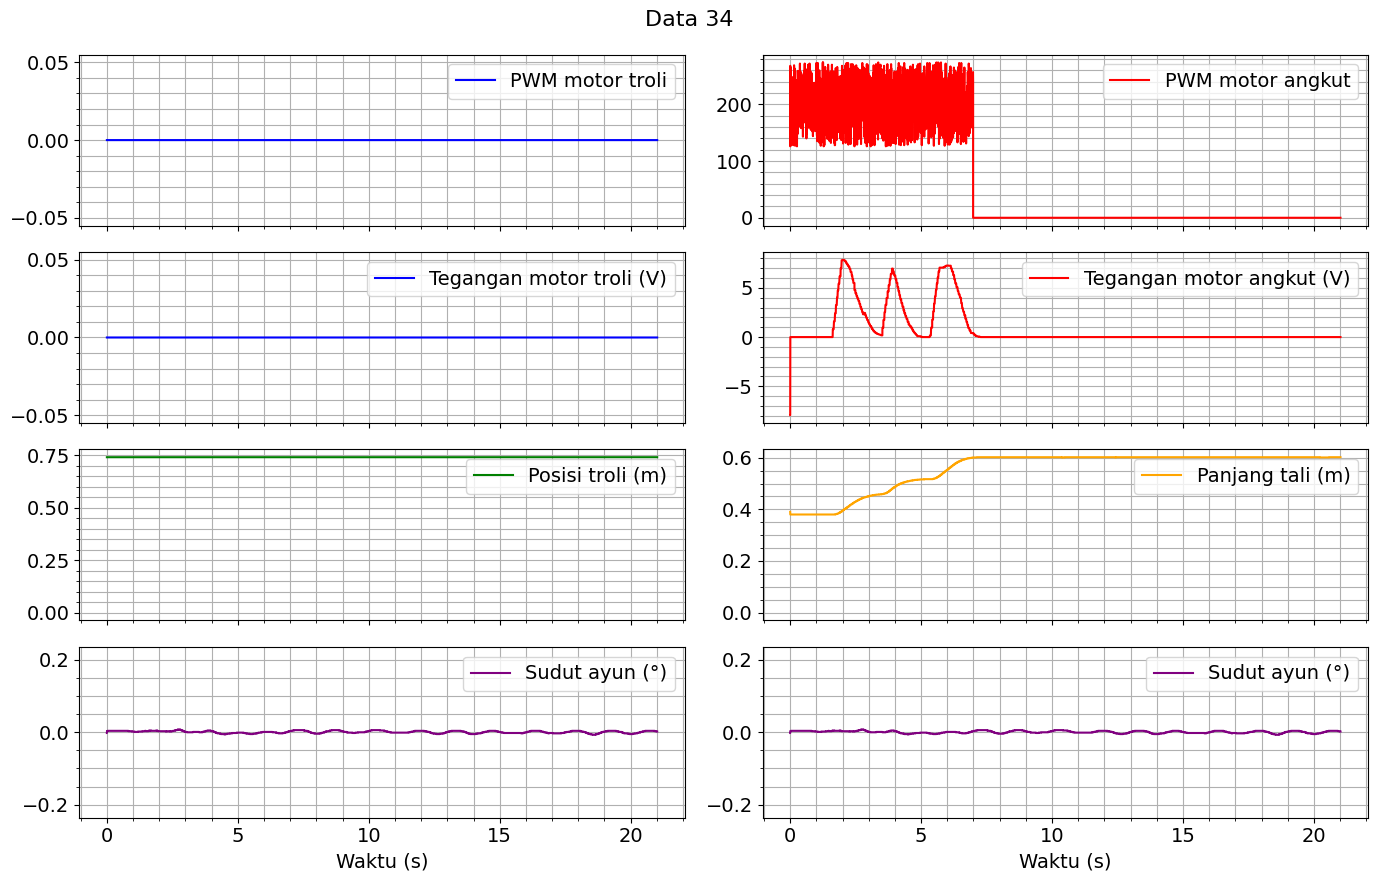

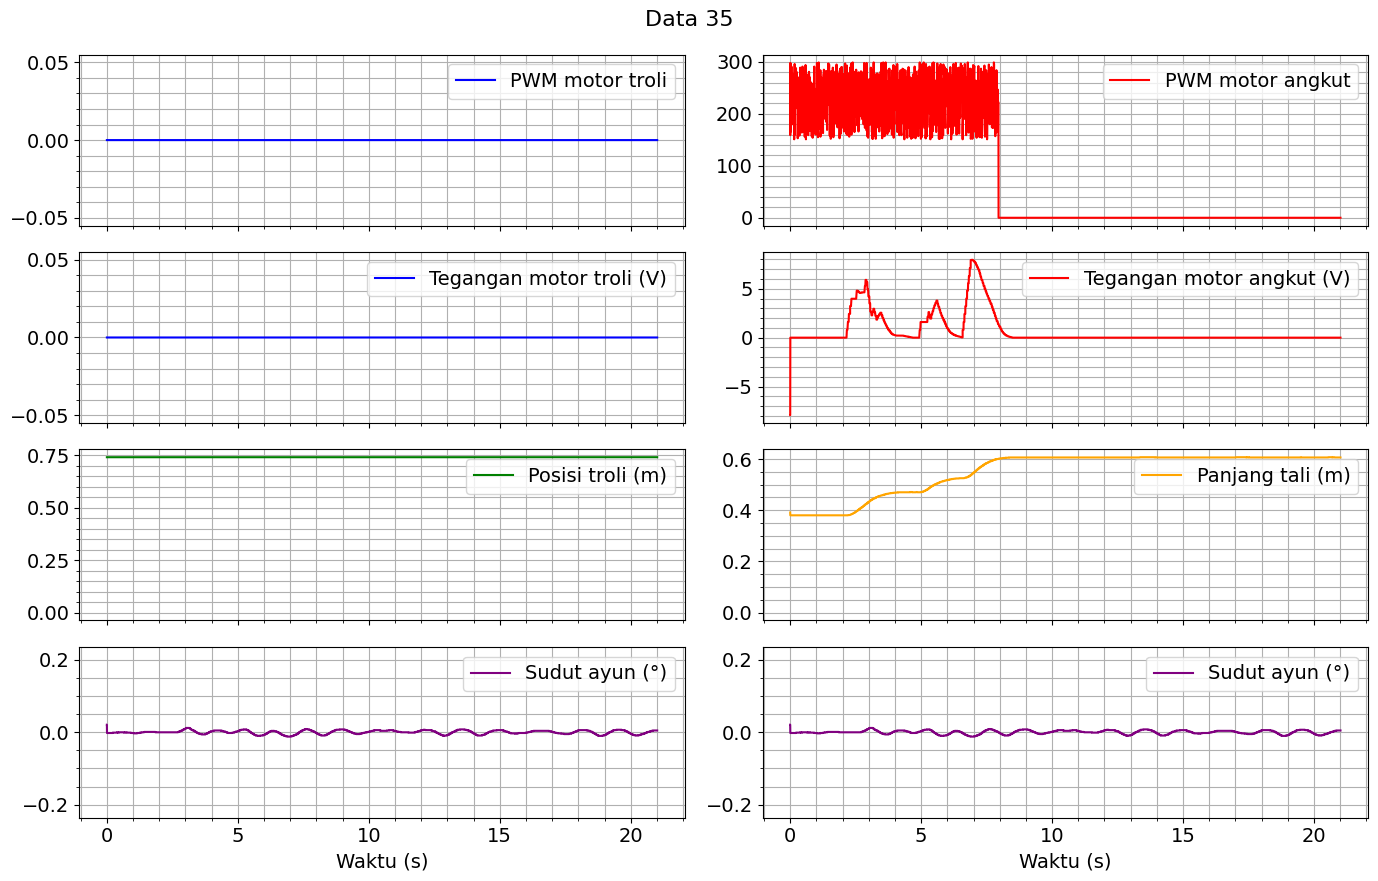

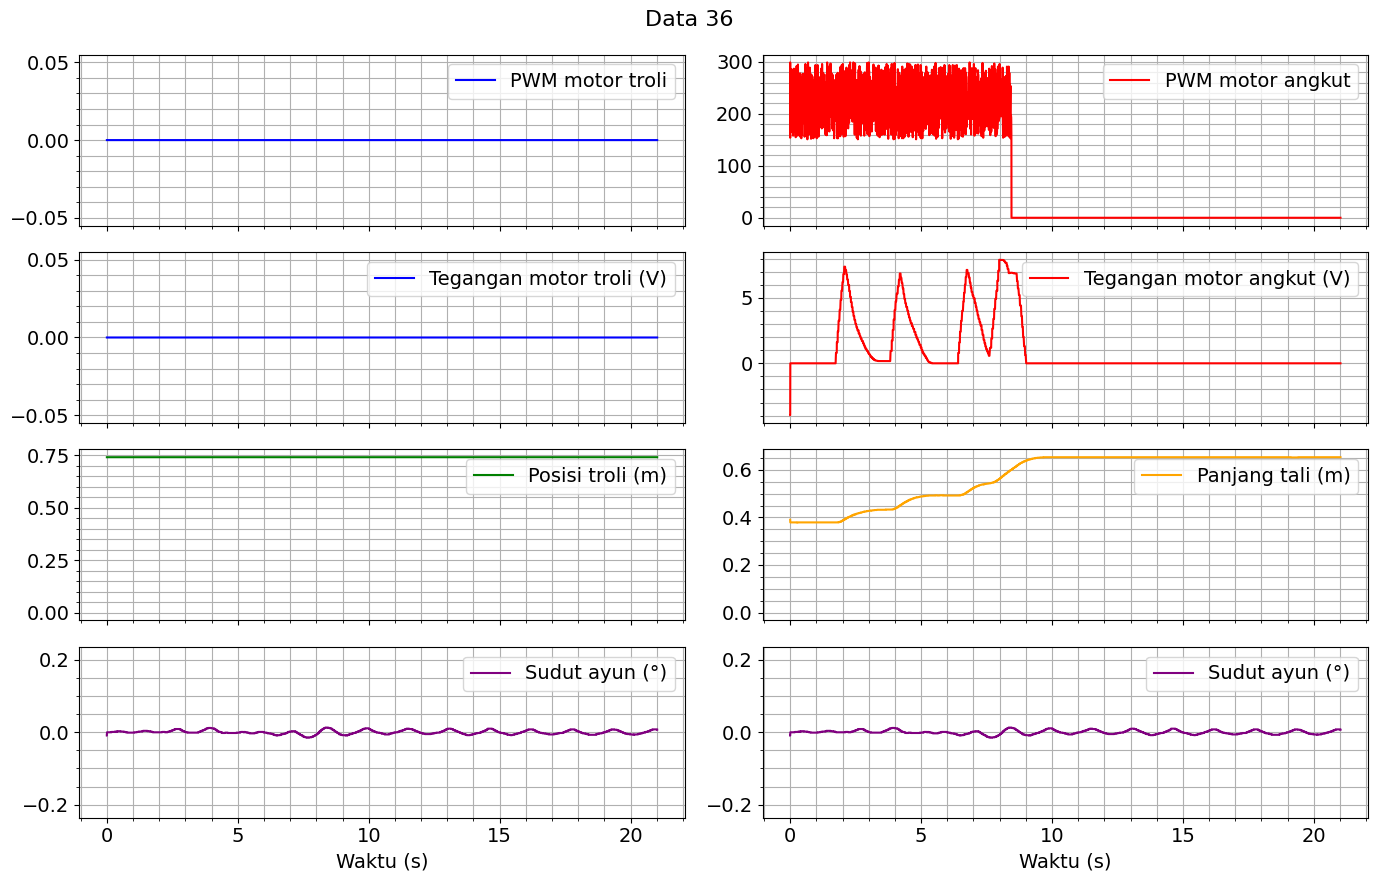

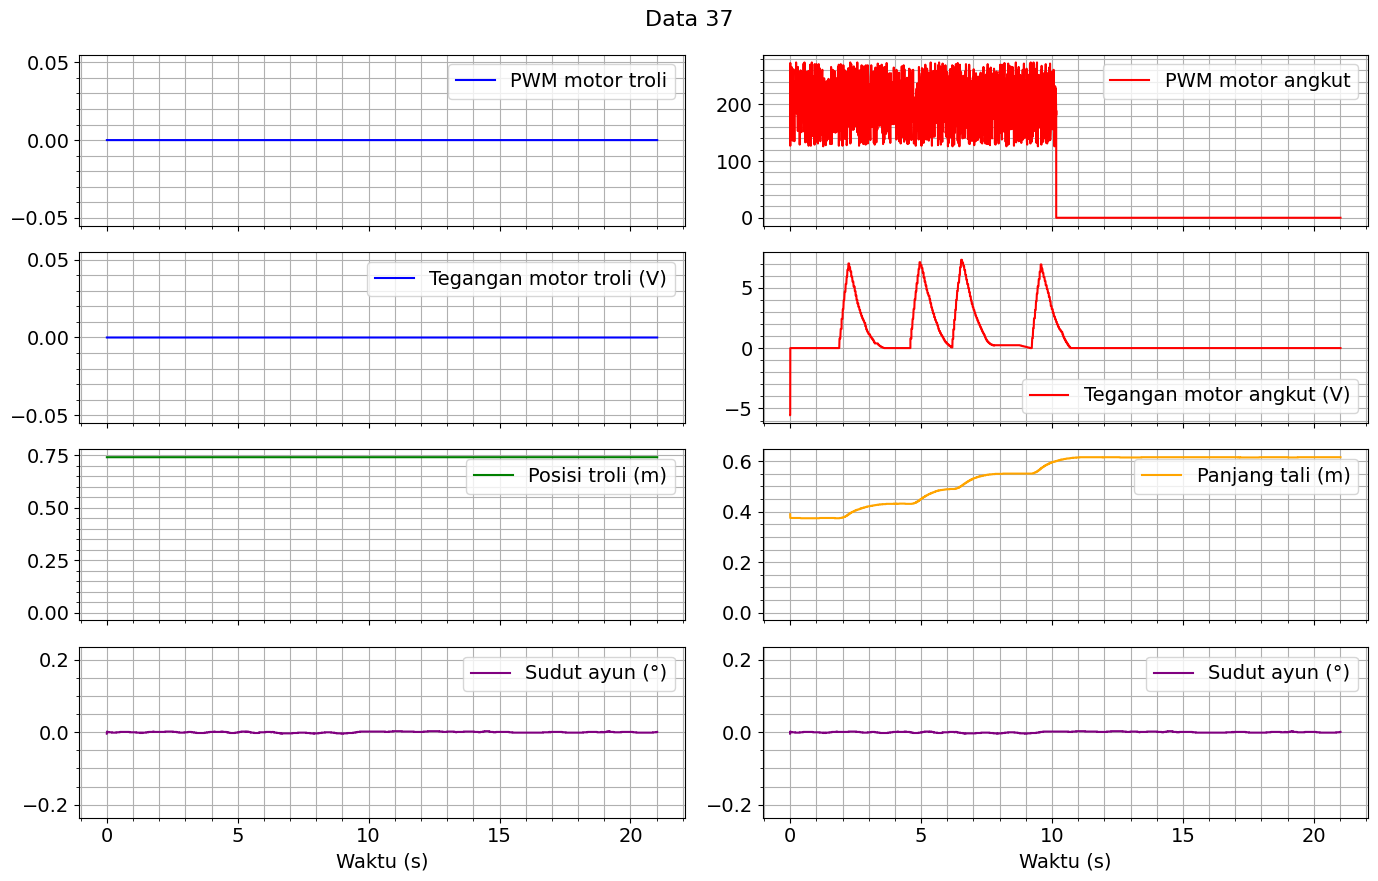

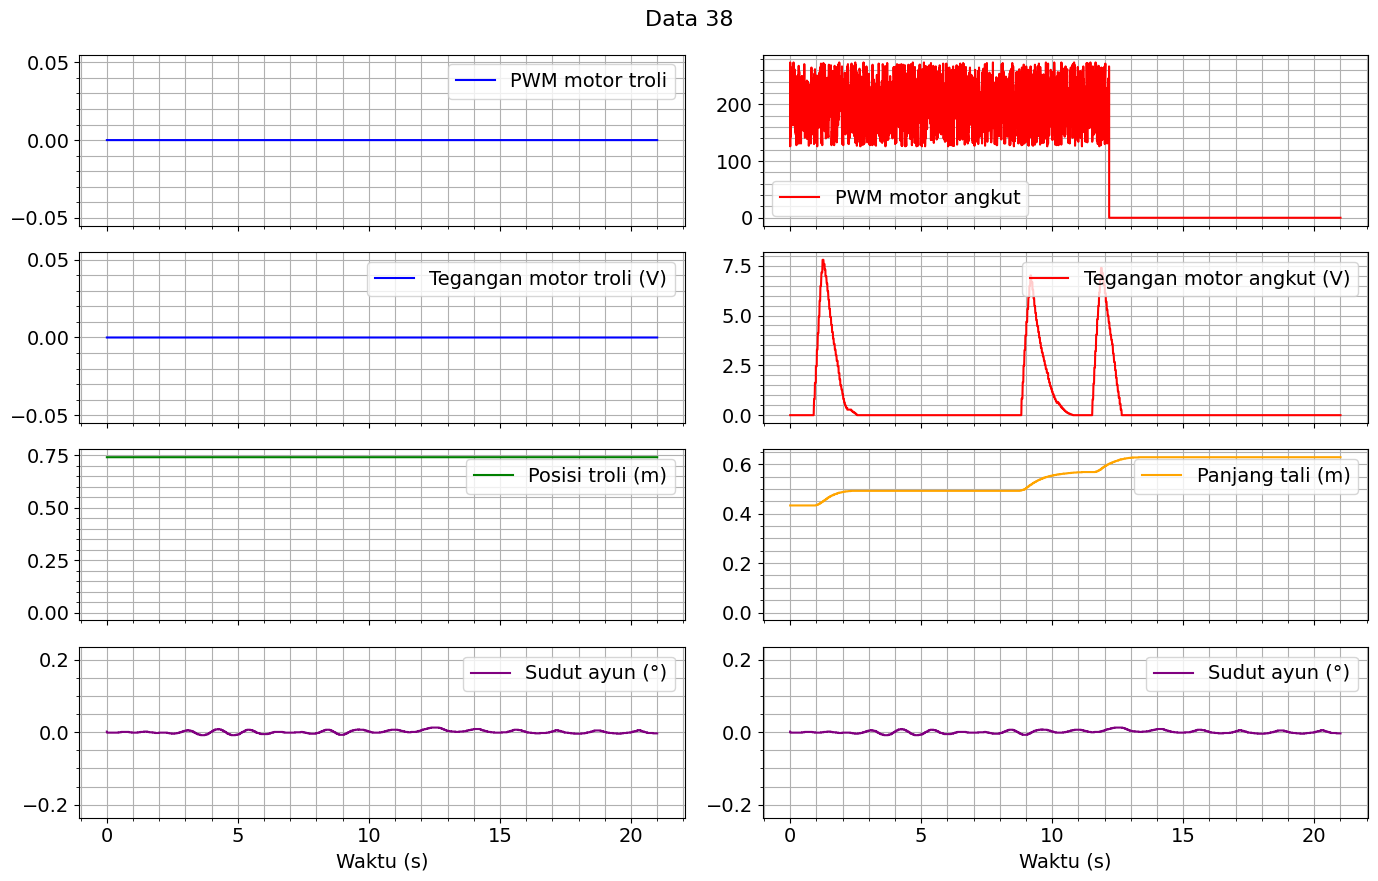

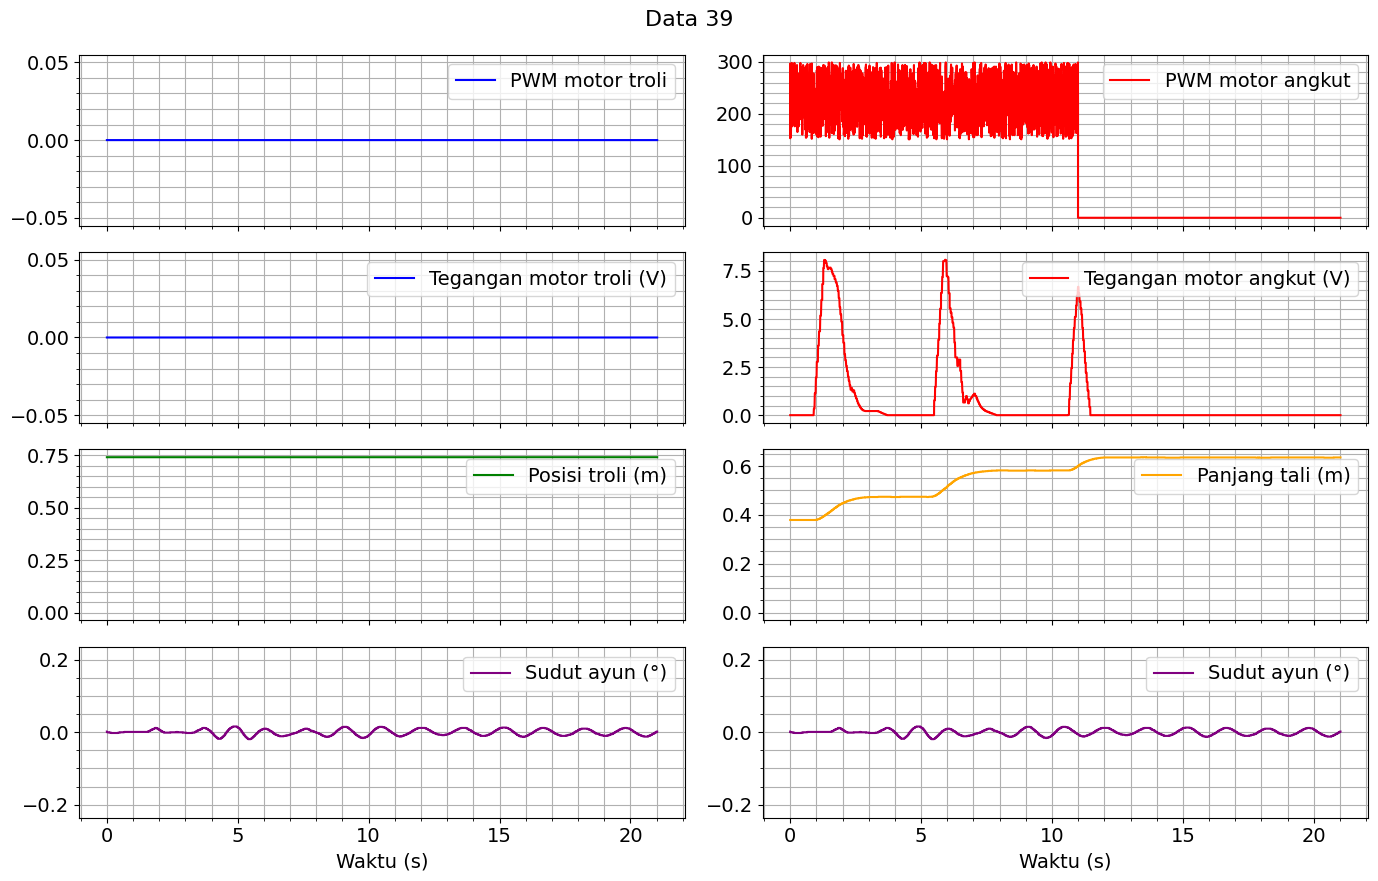

In [4]:
j = 0
show_variations = False
if show_variations:
        text = "Variasi"
else:
    text = "Data"

for i in range(len(datasets)):
    if show_variations and i % 3 != 0:
        continue
    j += 1
    # Create a figure and a set of subplots
    figure, ax = plt.subplots(4, 2, figsize=(14, 9), sharex=True)
    title = text + " " + str(j)
    figure.suptitle(title, fontsize=16)
    ut.add_to_subplot(ax[0, 0], datasets[i]["timestamp"], datasets[i]["pwm_trolley_motor"], ylabel="PWM motor troli", color="blue")
    ut.add_to_subplot(ax[0, 1], datasets[i]["timestamp"], datasets[i]["pwm_hoist_motor"], ylabel="PWM motor angkut", color="red")
    ut.add_to_subplot(ax[1, 0], datasets[i]["timestamp"], datasets[i]["trolley_motor_voltage"], ylabel="Tegangan motor troli (V)", color="blue")
    ut.add_to_subplot(ax[1, 1], datasets[i]["timestamp"], datasets[i]["hoist_motor_voltage"], ylabel="Tegangan motor angkut (V)", color="red")
    ut.add_to_subplot(ax[2, 0], datasets[i]["timestamp"], datasets[i]["trolley_position"], ylabel="Posisi troli (m)", color="green")
    ut.add_to_subplot(ax[2, 1], datasets[i]["timestamp"], datasets[i]["cable_length"], ylabel="Panjang tali (m)", color="orange")
    ut.add_to_subplot(ax[3, 0], datasets[i]["timestamp"], datasets[i]["sway_angle"], "Waktu (s)", "Sudut ayun (°)", "purple")
    ut.add_to_subplot(ax[3, 1], datasets[i]["timestamp"], datasets[i]["sway_angle"], "Waktu (s)", "Sudut ayun (°)", "purple")
    ax[3, 0].set_ylim(-max_sway_angle, max_sway_angle)
    ax[3, 1].set_ylim(-max_sway_angle, max_sway_angle)
    plt.tight_layout()
    # Save the figure as SVG
    plt.savefig(DIRECTORY + "figure/"+ text + "_" + str(j) +".svg")
    plt.show()